In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

# <span style=" background-color:#F7DDBE;">**0. 데이터 불러오기**

In [3]:
# 데이터 불러오기
eleven_all = pd.read_excel('data/track1_11번가.xlsx', sheet_name = None)
naver_all = pd.read_excel('data/track1_네이버.xls', sheet_name = None)

In [4]:
# 11번가 데이터 통합
eleven = pd.concat(eleven_all, ignore_index=True)
eleven

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,플랜트 정보,단독배송여부,GS홈쇼핑주문번호
0,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,11,40027368,...,CJ 밀당의고수 김말이 400G/냉동,3,3,0,0,택배배송,냉동,동탄센터 > 동탄일반,N,NaN
1,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,21,30253562,...,비비고/신)버섯야채죽 420G/상온,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN
2,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,22,30253562,...,비비고/신)버섯야채죽 420G/상온,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN
3,외부몰_직거래_11번가(신),20220527447726869,20220527,N,20220602,배송 완료,-,2022-06-02 06:06:12,11,30244682,...,다담/부대찌개양념 140G/24입/냉장,3,3,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN
4,외부몰_직거래_11번가(신),20220527447726869,20220527,N,20220602,배송 완료,-,2022-06-02 06:06:12,12,30244957,...,다담/우렁강된장비빔양념 140G/24입/냉장,3,3,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172438,외부몰_직거래_11번가(신),20220410411600682,20220410,N,20220411,배송 완료,-,2022-04-10 12:09:04,11,30245554,...,비비고/콩나물황태국 500G_18입/상온,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN
172439,외부몰_직거래_11번가(신),20220410411600682,20220410,N,20220411,배송 완료,-,2022-04-10 12:09:04,12,40044017,...,비비고/차돌육개장500G/상온,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN
172440,외부몰_직거래_11번가(신),20220410411598962,20220410,N,20220411,배송 완료,-,2022-04-10 17:24:01,11,30280590,...,CJ/고메바삭튀겨낸통등심돈카츠450G/냉동,1,1,0,0,택배배송,냉동,동탄센터 > 동탄일반,N,NaN
172441,외부몰_직거래_11번가(신),20220410411598962,20220410,N,20220411,배송 완료,-,2022-04-10 17:24:01,12,30280590,...,CJ/고메바삭튀겨낸통등심돈카츠450G/냉동,1,1,0,0,택배배송,냉동,동탄센터 > 동탄일반,N,NaN


In [5]:
# 네이버 데이터 통합
naver = pd.concat(naver_all, ignore_index=True)
naver

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,플랜트 정보,단독배송여부,GS홈쇼핑주문번호,등록일자
0,외부몰_직거래_네이버(신),2022063028753781,20220630,N,20220705,배송 완료,-,2022-07-05 10:50:12,11,40053106,...,3,3,0,0,택배배송,풀필먼트(저온),풀필먼트센터 > 풀필저온센터,N,NaN,NaN
1,외부몰_직거래_네이버(신),2022063028753781,20220630,N,20220705,배송 완료,-,2022-07-05 10:50:12,21,40129175,...,5,5,0,0,택배배송,풀필먼트(저온),풀필먼트센터 > 풀필저온센터,N,NaN,NaN
2,외부몰_직거래_네이버(신),2022063032834301,20220630,N,20220705,배송 완료,-,2022-07-05 02:20:30,11,40053106,...,3,3,0,0,택배배송,풀필먼트(저온),풀필먼트센터 > 풀필저온센터,N,NaN,NaN
3,외부몰_직거래_네이버(신),2022063028961451,20220630,N,20220706,배송 완료,-,2022-07-05 05:33:03,11,40127813,...,6,6,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
4,외부몰_직거래_네이버(신),2022063028961451,20220630,N,20220706,배송 완료,-,2022-07-05 05:33:03,21,40127812,...,6,6,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172142,외부몰_직거래_네이버(신),2022051523198071,20220515,N,20220516,배송 완료,-,2022-05-18 06:45:00,11,40076889,...,1,1,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
172143,외부몰_직거래_네이버(신),2022051523198071,20220515,N,20220516,배송 완료,-,2022-05-18 06:45:00,11,40076889,...,2,2,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
172144,외부몰_직거래_네이버(신),2022051523142581,20220515,N,20220516,배송 완료,-,2022-05-15 15:15:03,11,40117527,...,24,24,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
172145,외부몰_직거래_네이버(신),2022051523139021,20220515,N,20220516,배송 완료,-,2022-05-15 14:06:03,11,40118789,...,4,4,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN,NaN


In [6]:
# 네이버, 11번가 데이터 통합 -> df 생성
df = pd.concat([eleven, naver], ignore_index = True)
df

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,플랜트 정보,단독배송여부,GS홈쇼핑주문번호,등록일자
0,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,11,40027368,...,3,3,0,0,택배배송,냉동,동탄센터 > 동탄일반,N,NaN,NaN
1,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,21,30253562,...,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
2,외부몰_직거래_11번가(신),20220531450182654,20220531,N,20220603,배송 완료,-,2022-06-03 05:12:06,22,30253562,...,3,3,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
3,외부몰_직거래_11번가(신),20220527447726869,20220527,N,20220602,배송 완료,-,2022-06-02 06:06:12,11,30244682,...,3,3,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN,NaN
4,외부몰_직거래_11번가(신),20220527447726869,20220527,N,20220602,배송 완료,-,2022-06-02 06:06:12,12,30244957,...,3,3,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344585,외부몰_직거래_네이버(신),2022051523198071,20220515,N,20220516,배송 완료,-,2022-05-18 06:45:00,11,40076889,...,1,1,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
344586,외부몰_직거래_네이버(신),2022051523198071,20220515,N,20220516,배송 완료,-,2022-05-18 06:45:00,11,40076889,...,2,2,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
344587,외부몰_직거래_네이버(신),2022051523142581,20220515,N,20220516,배송 완료,-,2022-05-15 15:15:03,11,40117527,...,24,24,0,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN,NaN
344588,외부몰_직거래_네이버(신),2022051523139021,20220515,N,20220516,배송 완료,-,2022-05-15 14:06:03,11,40118789,...,4,4,0,0,택배배송,냉장,동탄센터 > 동탄일반,N,NaN,NaN


In [7]:
# df 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344590 entries, 0 to 344589
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   거래처        344590 non-null  object 
 1   거래처주문번호    344590 non-null  object 
 2   주문일        344590 non-null  int64  
 3   사은품여부      344590 non-null  object 
 4   출고예정일      344590 non-null  int64  
 5   주문/배송상태    344590 non-null  object 
 6   클레임 상태     344590 non-null  object 
 7   운송장등록일자    336496 non-null  object 
 8   상품순번       344590 non-null  int64  
 9   상품코드       344590 non-null  object 
 10  상품명        344590 non-null  object 
 11  상품수량       344590 non-null  int64  
 12  덤상품수량      344590 non-null  int64  
 13  상품유형       343921 non-null  object 
 14  상품타입       343921 non-null  object 
 15  매출액        344590 non-null  int64  
 16  자재코드       344590 non-null  int64  
 17  자재명        343921 non-null  object 
 18  초기자재수량     344590 non-null  int64  
 19  주문수량       344590 non-n

# <span style=" background-color:#F7DDBE;">**1. 데이터 전처리**

## <span style=" background-color:#f1f9ff;">**1-1 불필요한 컬럼 제거**

In [8]:
# 상품타입 

## '선물세트' 삭제 
## 1) 선물세트 개수가 28개로 매우 적음
## 2) 선물세트 상품명이 '특별한선물1호'와 같이 구성품이 무엇인지 알 수 없기 때문에 분석하는 것이 무의미하다고 판단

df = df[df.상품타입 != '선물세트']

In [9]:
print(df['상품타입'].isnull().sum())
print(len(df[df['상품코드']=='사은품']))

669
669


> 상품타입 : '선물세트'를 제외하면, '일반'과 결측치만 남는다.
<br>**상품타입의 결측치 수 = 상품코드의 사은품 수** 
<br>즉, 상품타입의 결측치 값은 사은품을 뜻한다.
<br>사은품 여부는 상품코드 컬럼을 통해서 확인 가능하므로 상품타입 컬럼의 결측치 값은 큰 의미가 없다.
<br> 상품타입에서 선물세트와 결측치를 제외하면 모두 '일반'이기 때문에 해당 컬럼은 무의미하다. 
<br>따라서 **'상품타입' 컬럼은 drop**하도록 한다.

In [10]:
# 배송유형 

## '3PL' 삭제
## 1) '3PL'로 배송된 제품은 모두 주문취소된 제품으로, 데이터 분석에 활용되지 않음

df = df[df.배송유형 != '3PL']

F-value: 2162.7535360121383
p-value: 0.0


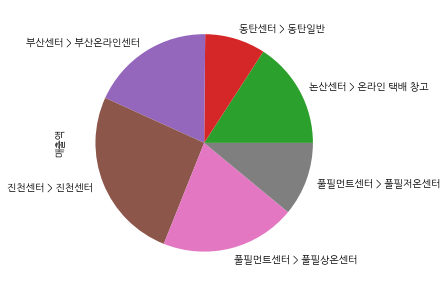

In [11]:
# 플랜트 정보

dfs = {}
df_test = pd.concat([eleven, naver], ignore_index = True)

for name, group in df_test.groupby('플랜트 정보'):
    dfs[name] = group

data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_test.groupby('플랜트 정보')['매출액'].mean()
grouped.plot(kind = 'pie', x = 'index', y = 'values', figsize = (5,5))
plt.show()

> H0 : 플랜트 정보에 따른 평균 매출액이 같다.
<br>H1 : 플랜트 정보에 따른 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 
<br>플랜트 정보에 따라 평균 매출액에 변동이 있다는 사실을 알 수 있다. 하지만 분석 진행 결과 각 플랜트를 이용하였을 경우 어떠한 효과가 있는지에 대한 정보가 불충분하다고 판단하였고, 따라서 **플랜트 정보 컬럼은 drop**하도록 한다.

In [12]:
# 결측치, 단일값으로 이루어진 컬럼 제거

## 덤상품수량 : 전부 결측치
## 상품타입 : '선물세트'를 제외하면 모두 '일반'과 결측치만 남음
## 배송유형 : '3PL'을 제외하면 모두 '택배배송'
## 플랜트 정보 : 부족한 정보로 인해서 이를 통해 유의미한 분석을 도출하는 것이 어려움
## 단독배송여부 : 전부 N (즉, 전부 단독배송하지 않음)
## GS홈쇼핑주문번호 : 전부 결측치
## 등록일자 : 네이버의 한 sheet에만 존재하며 모두 같은 날짜로 의미가 없다고 판단

df = df.drop(columns=['덤상품수량','상품타입','배송유형','플랜트 정보','단독배송여부','GS홈쇼핑주문번호','등록일자'])

## <span style=" background-color:#f1f9ff;">1-2 문자형 변수 > 수치형 변수 변환

In [13]:
# 거래처
## 11번가 : 0 / 네이버 : 1

df['거래처'] = df['거래처'].replace({'외부몰_직거래_11번가(신)':0, '외부몰_직거래_네이버(신)':1})
df['거래처'].value_counts()

0    172441
1    172106
Name: 거래처, dtype: int64

In [14]:
# 사은품여부
## N : 0 / Y : 1

df['사은품여부'] = df['사은품여부'].replace({'N':0, 'Y':1})
df['사은품여부'].value_counts()

0    341734
1      2813
Name: 사은품여부, dtype: int64

In [15]:
# 주문/배송상태
## 배송 완료 : 0 / 주문취소 : 1 / 배송 취소 : 2 / 배송 중 : 3 / 배송 준비 : 4 / 주문완료 : 5 / 출고 지시 : 6

df['주문/배송상태'] = df['주문/배송상태'].replace({'배송 완료':0, '주문취소':1, '배송 취소':2, '배송 중':3, '배송 준비':4, '주문완료':5, '출고 지시':6})
df['주문/배송상태'].value_counts()

0    335838
1      8569
2        73
3        52
4        11
5         3
6         1
Name: 주문/배송상태, dtype: int64

In [16]:
# 클레임 상태
## - : 0 / 취소완료 : 1 / 반품처리중 : 2 / 교환완료 : 3 / 교환처리중 : 4 / 반품철회 : 5 / 반품완료 : 6 / 교환철회 : 7 / 반품신청 : 8

df['클레임 상태'] = df['클레임 상태'].replace({'-':0, '취소완료':1, '반품처리중':2, '교환완료':3, '교환처리중':4, '반품철회':5, '반품완료':6, '교환철회':7, '반품신청':8})
df['클레임 상태'].value_counts()

0    334826
1      8569
2       524
3       370
4       238
5        15
6         3
8         1
7         1
Name: 클레임 상태, dtype: int64

In [17]:
# 상품유형
## 단일 상품 : 0 / 묶음 상품 : 1 / 복합 상품 : 2

df['상품유형'] = df['상품유형'].replace({'단일 상품':0, '묶음 상품':1, '복합 상품':2})
df['상품유형'].value_counts()

1.0    155493
0.0    137447
2.0     50938
Name: 상품유형, dtype: int64

In [18]:
# 마감구분 
## 풀필먼트 : 자재명에 명시되어 있는 마감구분 정보 추출
## 상온 : 0 / 냉동 : 1 / 냉장 : 2

print(df['마감구분'].value_counts())

df = df.reset_index() 
df['Contains_풀필먼트'] = df['마감구분'].str.contains('풀필먼트')
count = 0
frozen = '냉동'
fridge = '냉장'
outside = '상온'
df['마감구분'] = df['마감구분'].replace({'상온':0, '냉동':1, '냉장':2})
for j in df['Contains_풀필먼트']:
    if j == True:
        if frozen in df['자재명'][count]:
            df['마감구분'][count] = 1
        elif fridge in df['자재명'][count]:
            df['마감구분'][count] = 2
        elif outside in df['자재명'][count]:
            df['마감구분'][count] = 0
    count = count + 1
df['마감구분'] = df['마감구분'].replace({'풀필먼트(상온)':0, '풀필먼트(저온)':1})
print(df['마감구분'].value_counts())

냉동          126573
상온          106353
냉장           63083
풀필먼트(상온)     35600
풀필먼트(저온)     12938
Name: 마감구분, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    140798
1    139063
2     64686
Name: 마감구분, dtype: int64


## <span style=" background-color:#f1f9ff;">**1-3 파생변수 생성**
- 월 (from 주문일)
- 출고날짜오차 : 운송장등록날짜 - 출고예정일
- 예상출고소요기간 :  출고예정일 - 주문일
- 실제출고소요기간 : 운송장등록날짜 - 주문일
- 자재명_분류 (from 자재명)
- 묶음수량 : 초기자재수량 / 상품수량

In [19]:
# 월 추출 from [주문일]
df['주문일'] = pd.to_datetime(df['주문일'], format='%Y%m%d')
df['월'] = df['주문일'].dt.month
print(df['월'].value_counts())

5    168862
6     88961
4     86724
Name: 월, dtype: int64


In [20]:
# 출고날짜오차 : 운송장등록날짜 - 출고예정일
# 예상출고소요기간 :  출고예정일 - 주문일
# 실제출고소요기간 : 운송장등록날짜 - 주문일

lst1 = []
lst2 = []
count = 0
for date in df['운송장등록일자']:
    if str(date) != "nan":
        dates = str(date).split()
        lst1.append(dates[0])
        lst2.append(dates[1])
    else:
        lst1.append(None)
        lst2.append(None)
    count = count + 1
    
df['운송장등록날짜'] = lst1
df['운송장등록시간'] = lst2
df['운송장등록날짜'] = pd.to_datetime(df['운송장등록날짜'])

df['출고예정일'] = pd.to_datetime(df['출고예정일'], format = "%Y%m%d")
df['주문일'] = pd.to_datetime(df['주문일'], format = "%Y%m%d")

df['출고날짜오차'] = df['운송장등록날짜'] - df['출고예정일']
df['예상출고소요기간'] = df['출고예정일'] - df['주문일']
df['실제출고소요기간'] = df['운송장등록날짜'] - df['주문일']
print(df['출고날짜오차'])
print(df['예상출고소요기간'])
print(df['실제출고소요기간'])

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
344542    2 days
344543    2 days
344544   -1 days
344545   -1 days
344546   -1 days
Name: 출고날짜오차, Length: 344547, dtype: timedelta64[ns]
0        3 days
1        3 days
2        3 days
3        6 days
4        6 days
          ...  
344542   1 days
344543   1 days
344544   1 days
344545   1 days
344546   1 days
Name: 예상출고소요기간, Length: 344547, dtype: timedelta64[ns]
0        3 days
1        3 days
2        3 days
3        6 days
4        6 days
          ...  
344542   3 days
344543   3 days
344544   0 days
344545   0 days
344546   0 days
Name: 실제출고소요기간, Length: 344547, dtype: timedelta64[ns]


In [21]:
# 자재명_분류 : 자재명 컬럼으로부터 브랜드를 고려하여 분류

lst = []
for name in df['자재명']:
    if isinstance(name, str):
        if '비비고' in name:
            lst.append('비비고')
        elif ('카놀라유' in name) | ('포도씨유' in name) | ('백설' in name) | ('올리고당' in name) | ('올리브유' in name) | ('옥수수유' in name) | \
                ('요리당' in name) | ('들기름' in name) | ('요리유' in name) | ('밀가루' in name) | ('튀김가루' in name) | ('설탕' in name) | ('콩기름' in name) | \
                ('부침가루' in name) | ('중력' in name) | ('해바라기씨유' in name) | ('가루' in name):
            lst.append('백설')
        elif '쿡킷' in name:
            lst.append('쿡킷')
        elif '햇반' in name:
            lst.append('햇반')
        elif '고메' in name:
            lst.append('고메')
        elif 'The더건강한' in name:
            lst.append('The더건강한')
        elif '다시다' in name:
            lst.append('다시다')
        elif '해찬들' in name:
            lst.append('해찬들')
        elif '스팸' in name:
            lst.append('스팸')
        elif '삼호' in name:
            lst.append('삼호')
        elif '하선정' in name:
            lst.append('하선정')
        elif '행복한콩' in name:
            lst.append('행복한콩')
        elif '다담' in name:
            lst.append('다담')
        elif '산들애' in name:
            lst.append('산들애')
        elif '메티에' in name:
            lst.append('메티에')
        elif '쁘띠첼' in name:
            lst.append('쁘띠첼')
        elif '맥스봉' in name:
            lst.append('맥스봉')
        elif ('맛밤' in name) | ('맛군밤' in name) | ('톡톡까먹어밤' in name):
            lst.append('밤')
        elif '즐거운동행' in name:
            lst.append('즐거운동행')
        elif '미정당' in name:
            lst.append('미정당')
        elif '밀당의고수' in name:
            lst.append('밀당의고수')
        elif '냉면' in name:
            lst.append('냉면')
        elif '닭가슴살' in name:
            lst.append('닭가슴살')
        elif '고추장' in name:
            lst.append('고추장')
        elif '더건강한' in name:
            lst.append('더건강한')
        elif '크레잇' in name:
            lst.append('크레잇')
        elif '쌈장' in name:
            lst.append('쌈장')
        elif '시럽' in name:
            lst.append('시럽')
        elif '명가' in name:
            lst.append('명가')
        elif '소금' in name:
            lst.append('소금')
        elif '밥이랑' in name:
            lst.append('밥이랑')
        elif '꼬마' in name:
            lst.append('꼬마')
        elif '드레싱' in name:
            lst.append('드레싱')
        elif '믹스' in name:
            lst.append('믹스')
        elif '된장' in name:
            lst.append('된장')
        else:
            lst.append('기타')
    else:
        lst.append(0)

df['자재명_분류'] = lst
unique_values = df['자재명_분류'].unique()
display(df['자재명_분류'].value_counts()) 

비비고      121151
햇반       102442
다담        40243
고메        30791
백설        17364
스팸         6987
냉면         4264
기타         3605
쁘띠첼        2632
닭가슴살       1988
고추장        1872
꼬마         1507
다시다        1185
명가          959
맥스봉         771
0           669
더건강한        647
밥이랑         623
크레잇         619
믹스          579
하선정         525
된장          516
밀당의고수       370
밤           362
쿡킷          322
드레싱         230
미정당         223
쌈장          218
즐거운동행       185
삼호          156
행복한콩        143
산들애         137
시럽          137
소금          100
메티에          25
Name: 자재명_분류, dtype: int64

In [22]:
# 묶음수량 : 초기자재수량 / 상품수량

df['묶음수량'] = df['초기자재수량'] / df['상품수량']

In [23]:
# 불필요한 컬럼 제거

## index : 파생변수 생성을 위해 임시로 만들어진 컬럼, 무의미하므로 삭제
## 운송장등록일자 : '운송장등록날짜', '운송장등록시간' 컬럼과 중복되므로 삭제
## Contains_풀필먼트 : 마감구분을 분류하기 위해 임시로 만들어진 컬럼, 무의미하므로 삭제

df = df.drop(columns=['index','운송장등록일자','Contains_풀필먼트'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344547 entries, 0 to 344546
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype          
---  ------    --------------   -----          
 0   거래처       344547 non-null  int64          
 1   거래처주문번호   344547 non-null  object         
 2   주문일       344547 non-null  datetime64[ns] 
 3   사은품여부     344547 non-null  int64          
 4   출고예정일     344547 non-null  datetime64[ns] 
 5   주문/배송상태   344547 non-null  int64          
 6   클레임 상태    344547 non-null  int64          
 7   상품순번      344547 non-null  int64          
 8   상품코드      344547 non-null  object         
 9   상품명       344547 non-null  object         
 10  상품수량      344547 non-null  int64          
 11  상품유형      343878 non-null  float64        
 12  매출액       344547 non-null  int64          
 13  자재코드      344547 non-null  int64          
 14  자재명       343878 non-null  object         
 15  초기자재수량    344547 non-null  int64          
 16  주문수량      344547 non

# <span style=" background-color:#F7DDBE;">**2. Main Data**

## <span style=" background-color:#f1f9ff;">**2-1 Main Data 추출**
- 주문/배송상태 > 0 (배송완료)
- 클레임 상태 > 0(-),  3(교환완료), 4(교환처리중), 5(반품철회)

In [25]:
# main data 생성
main = df[(df['주문/배송상태'] == 0) & (df['클레임 상태'].isin([0,3,4,5]))]

In [26]:
main

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,상품순번,상품코드,상품명,...,반품수량,마감구분,월,운송장등록날짜,운송장등록시간,출고날짜오차,예상출고소요기간,실제출고소요기간,자재명_분류,묶음수량
0,0,20220531450182654,2022-05-31,0,2022-06-03,0,0,11,40027368,[11번가]밀당의고수 김말이 400gX3개,...,0,1,5,2022-06-03,05:12:06,0 days,3 days,3 days,밀당의고수,3.0
1,0,20220531450182654,2022-05-31,0,2022-06-03,0,0,21,30253562,[11번가] 비비고 버섯야채죽 450Gx3개,...,0,0,5,2022-06-03,05:12:06,0 days,3 days,3 days,비비고,3.0
2,0,20220531450182654,2022-05-31,0,2022-06-03,0,0,22,30253562,[11번가] 비비고 버섯야채죽 450Gx3개,...,0,0,5,2022-06-03,05:12:06,0 days,3 days,3 days,비비고,3.0
3,0,20220527447726869,2022-05-27,0,2022-06-02,0,0,11,30244682,[11번가]다담 부대찌개양념 140Gx3개,...,0,2,5,2022-06-02,06:06:12,0 days,6 days,6 days,다담,3.0
4,0,20220527447726869,2022-05-27,0,2022-06-02,0,0,12,30244957,[11번가] 다담 우렁강된장 비빔 양념 140GX3개입,...,0,2,5,2022-06-02,06:06:12,0 days,6 days,6 days,다담,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344542,1,2022051523198071,2022-05-15,0,2022-05-16,0,0,11,40076889,01.포도씨유900x2+카놀라유500x1,...,0,0,5,2022-05-18,06:45:00,2 days,1 days,3 days,백설,1.0
344543,1,2022051523198071,2022-05-15,0,2022-05-16,0,0,11,40076889,01.포도씨유900x2+카놀라유500x1,...,0,0,5,2022-05-18,06:45:00,2 days,1 days,3 days,백설,2.0
344544,1,2022051523142581,2022-05-15,0,2022-05-16,0,0,11,40117527,햇반 현미쌀밥 210Gx24개,...,0,0,5,2022-05-15,15:15:03,-1 days,1 days,0 days,햇반,24.0
344545,1,2022051523139021,2022-05-15,0,2022-05-16,0,0,11,40118789,다담 된장찌개 양념 530Gx2개,...,0,2,5,2022-05-15,14:06:03,-1 days,1 days,0 days,다담,2.0


In [27]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335324 entries, 0 to 344546
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype          
---  ------    --------------   -----          
 0   거래처       335324 non-null  int64          
 1   거래처주문번호   335324 non-null  object         
 2   주문일       335324 non-null  datetime64[ns] 
 3   사은품여부     335324 non-null  int64          
 4   출고예정일     335324 non-null  datetime64[ns] 
 5   주문/배송상태   335324 non-null  int64          
 6   클레임 상태    335324 non-null  int64          
 7   상품순번      335324 non-null  int64          
 8   상품코드      335324 non-null  object         
 9   상품명       335324 non-null  object         
 10  상품수량      335324 non-null  int64          
 11  상품유형      334812 non-null  float64        
 12  매출액       335324 non-null  int64          
 13  자재코드      335324 non-null  int64          
 14  자재명       334812 non-null  object         
 15  초기자재수량    335324 non-null  int64          
 16  주문수량      335324 non

## <span style=" background-color:#f1f9ff;">**2-2 Main Data 분석**
1. 거래처 : 11번가, 네이버 데이터 따른 매출액 분석
2. 주문일 : 4,5,6월 데이터에 따른 매출액 분석 
3. 사은품 여부 : 사은품을 포함 여부를 기준으로 매출액 분석
4. 상품유형 : 상품유형(단일상품, 묶음상품 / 복합상품 / 사은품)을 기준으로 매출액 분석
5. 자재명 분류 : 자재명들의 브랜드와 공통된 자재명을 가진 데이터들을 그룹화하여 각각의 매출액 분석
6. 마감구분 : 냉동, 냉장, 상온 각각의 매출액 분석
7. 거래처주문번호 : 동시에 구매한 상품들을 분석해서 어떤 상품들을 복합상품으로 묶어야 효과적인지에 대해 분석

### <span style=" background-color:#fff5b1;">**(1) 거래처**

F-value: 211.7047100718525
p-value: 0.0


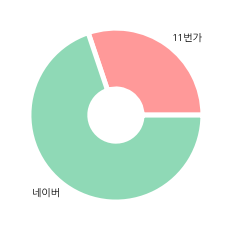

In [28]:
# 거래처별 매출액 평균
dfs = {}

for name, group in main.groupby('주문일'):  # 주문일 기준 group 형성
    dfs[name] = group

data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main.groupby('거래처')['매출액'].mean()
plt.pie(grouped, labels=['11번가','네이버'], colors=['#ff9999','#8fd9b6'], wedgeprops=wedgeprops)
plt.show()

> H0 : 11번가와 네이버의 평균 매출액이 같다.
<br>H1 : 11번가와 네이버의 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 
<br>11번가와 네이버의 매출액 평균이 같지 않으므로 11번가와 네이버에서 주로 판매되는 제품에는 차이가 있다는 사실을 도출할 수 있다.

In [29]:
main[main['거래처'] == 0]['자재명_분류'].value_counts()

비비고      74475
다담       37685
햇반       21653
고메       19912
백설        4151
기타        1663
스팸        1436
쁘띠첼       1282
냉면        1025
꼬마         763
닭가슴살       636
고추장        552
다시다        532
하선정        355
밀당의고수      289
맥스봉        279
믹스         275
더건강한       226
드레싱        176
밥이랑        161
쌈장         129
미정당        126
삼호         119
명가         109
산들애         97
된장          83
즐거운동행       67
행복한콩        50
크레잇         34
소금          28
Name: 자재명_분류, dtype: int64

In [30]:
main[main['거래처'] == 1]['자재명_분류'].value_counts()

햇반       77908
비비고      44038
백설       12213
고메       10225
스팸        5430
냉면        3128
기타        1820
다담        1505
쁘띠첼       1301
닭가슴살      1277
고추장       1259
명가         827
꼬마         706
다시다        639
크레잇        568
0          512
밥이랑        458
맥스봉        453
된장         422
더건강한       402
밤          350
믹스         290
쿡킷         290
하선정        154
시럽         129
즐거운동행      112
행복한콩        88
미정당         85
쌈장          84
밀당의고수       75
소금          68
드레싱         49
산들애         38
삼호          31
메티에         22
Name: 자재명_분류, dtype: int64

### <span style=" background-color:#fff5b1;">**(2) 주문일**</span>
#### **월별 시각화** (4월, 5월, 6월)
<span style=" background-color:#ffdce0;">**4월**</span>

0    84772
Name: 거래처, dtype: int64
F-value: 99.19301887212761
p-value: 0.0


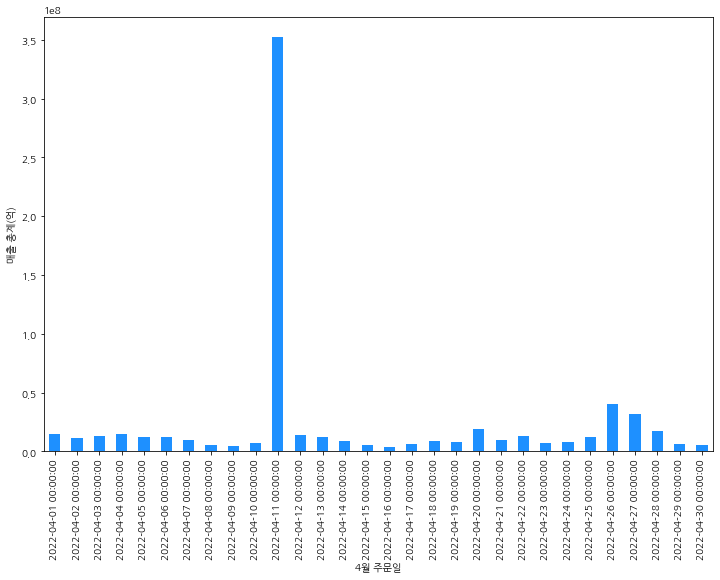

In [31]:
# 4월 주문일에 따른 매출액 총계

dfs = {}
df_april = main[main['월'] == 4]
print(df_april['거래처'].value_counts())  # 4월엔 11번가 데이터만 있음을 확인

for name, group in df_april.groupby('주문일'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)

print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_april.groupby('주문일')['매출액'].sum()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('4월 주문일')
plt.ylabel('매출 총계(억)')
plt.show()

> **4월 > 11번가 데이터만 존재**
<br>H0 : 4월 주문일 별 평균 매출액이 같다.
<br>H1 : 4월 주문일 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
<br>4월 주문일 별 매출액 평균이 같지 않으므로, 각 주문일마다 특성이 있다는 사실을 도출할 수 있다.

> **그래프 분석**
<br>4월 주문일 별 매출 총계 시각화를 통해 '2022-04-11'에 매출이 급증한다는 것을 확인하였다. '2022-04-11'에 특별한 사건이 있었을 것이라고 예상했고 이를 바탕으로 조사한 결과, 11번가에선 <십일절>이라는 행사를 매월 11일에 진행한다는 것을 파악하였다. 이로 인해 '2022-04-11'에 11번가 매출이 급증했다는 분석 결과를 도출할 수 있으며, 십일절 행사와 연관 지어 마케팅 전략을 구상할 수 있을 것이다.

<span style=" background-color:#ffdce0;">**6월**</span>

1    87325
Name: 거래처, dtype: int64
F-value: 92.88157530266054
p-value: 0.0


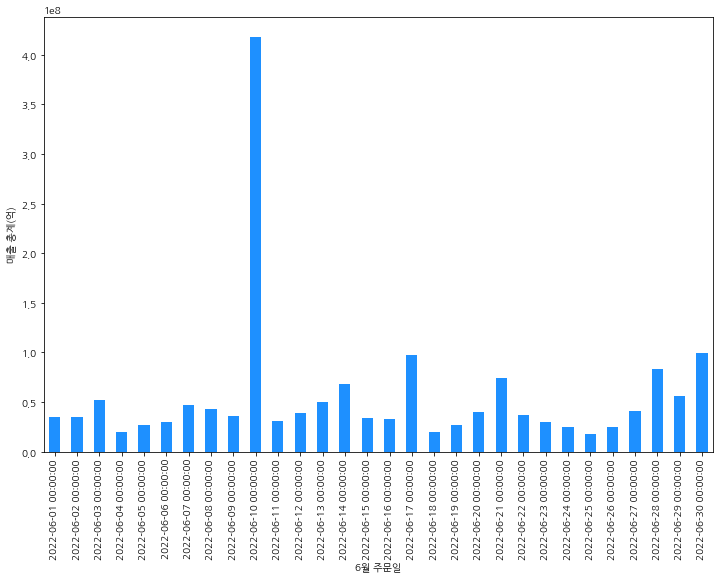

In [32]:
# 6월 주문일에 따른 매출액 총계

dfs = {}
df_june = main[main['월'] == 6]
print(df_june['거래처'].value_counts()) # 6월엔 네이버 데이터만 있음을 확인

for name, group in df_june.groupby('주문일'):
    dfs[name] = group

data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_june.groupby('주문일')['매출액'].sum()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('6월 주문일')
plt.ylabel('매출 총계(억)')
plt.show()

> **6월 > 네이버 데이터만 존재**
<br>H0 : 6월 주문일 별 평균 매출액이 같다.
<br>H1 : 6월 주문일 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
<br>6월 주문일 별 매출액 평균이 같지 않으므로, 각 주문일마다 특성이 있다는 사실을 도출할 수 있다.

> **그래프 분석**
<br>6월 주문일 별 매출 총계 시각화를 통해 '2022-06-10'에 매출이 급증한다는 것을 확인하였다. '2022-06-10'에 특별한 사건이 있었을 것이라고 예상했고 이를 바탕으로 조사해 보았지만, 11번가의 <십일절>과 같은 특별한 행사는 찾아볼 수 없었다. 따라서 네이버의 5월 데이터가 6월 데이터와 비슷한 경향을 가지는지 우선적으로 확인해 보고, 가격의 변동에 차이가 있는지 확인해 본다. 

<span style=" background-color:#ffdce0;">**5월**</span>

0    83596
1    79631
Name: 거래처, dtype: int64
F-value: 139.02215588829745
p-value: 0.0


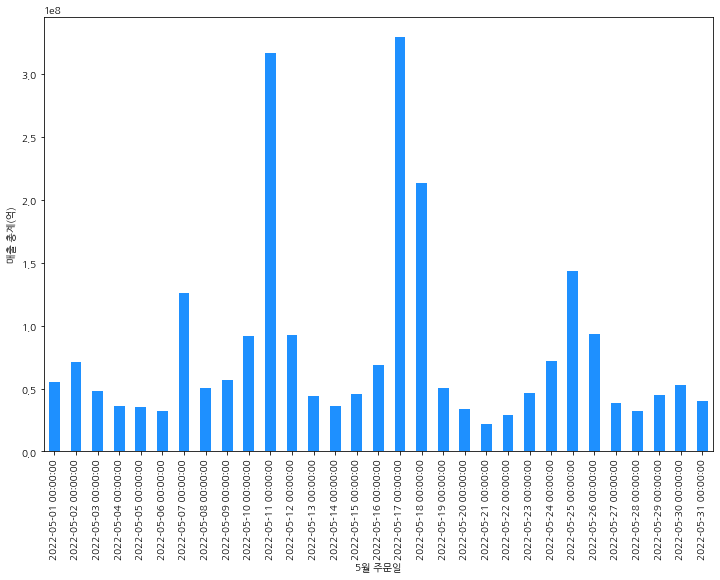

In [33]:
# 5월 주문일에 따른 매출액 총계

dfs = {}
df_may = main[main['월'] == 5]
print(df_may['거래처'].value_counts())  # 5월엔 11번가와 네이버 데이터 모두 존재

for name, group in df_may.groupby('주문일'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)

print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_may.groupby('주문일')['매출액'].sum()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('5월 주문일')
plt.ylabel('매출 총계(억)')
plt.show()

> **5월 > 11번가, 네이버 데이터 혼재**
<br>H0 : 5월 주문일 별 평균 매출액이 같다.
<br>H1 : 5월 주문일 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
<br>5월 주문일 별 매출액 평균이 같지 않으므로, 각 주문일마다 특성이 있다는 사실을 도출할 수 있다. 
<br>위의 5월 데이터는 네이버와 11번가 데이터가 혼재되어 있기 때문에 ANOVA Test를 진행하여도 뚜렷한 분석 결과를 도출하기가 쉽지 않다. 
##### 따라서 거래처별로 나눈 다음, 5월의 데이터를 시각화해보자

F-value: 34.695425247048334
p-value: 2.5228648715966202e-198


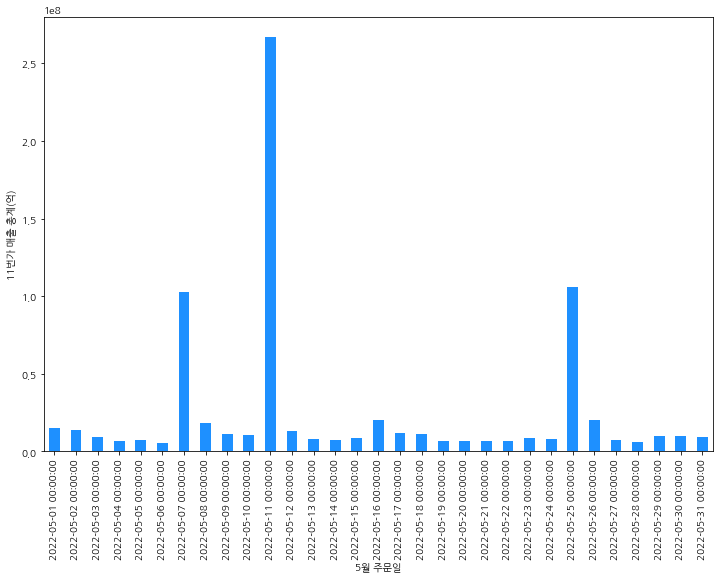

In [34]:
# 거래처 : 11번가 >> 5월 주문일 별 매출액 추이

dfs = {}
df_eleven = main[main['거래처'] == 0]
df_eleven_may = df_eleven[df_eleven['월'] == 5]

for name, group in df_eleven_may.groupby('주문일'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_eleven_may.groupby('주문일')['매출액'].sum()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('5월 주문일')
plt.ylabel('11번가 매출 총계(억)')
plt.show()

> **5월 > 11번가 데이터**
<br>H0 : 11번가 데이터에서 5월 주문일 별 평균 매출액이 같다.
<br>H1 : 11번가 데이터에서 5월 주문일 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
<br>11번가 데이터의 5월 주문일 별 매출액 평균이 같지 않으므로, 각 주문일마다 특성이 있다는 사실을 도출할 수 있다.


> **그래프 분석**
<br>5월 주문일 별 11번가 매출 총계 시각화를 통해 '2022-05-11'에 매출이 급증한다는 것을 확인하였다. 4월과 마찬가지로 11번가의 <십일절> 행사로 인해 매출이 급증했다는 분석 결과를 도출할 수 있으며, 십일절 행사와 연관 지어 마케팅 전략을 구상할 수 있을 것이다.

F-value: 18.944897265637618
p-value: 2.5885018098437266e-100


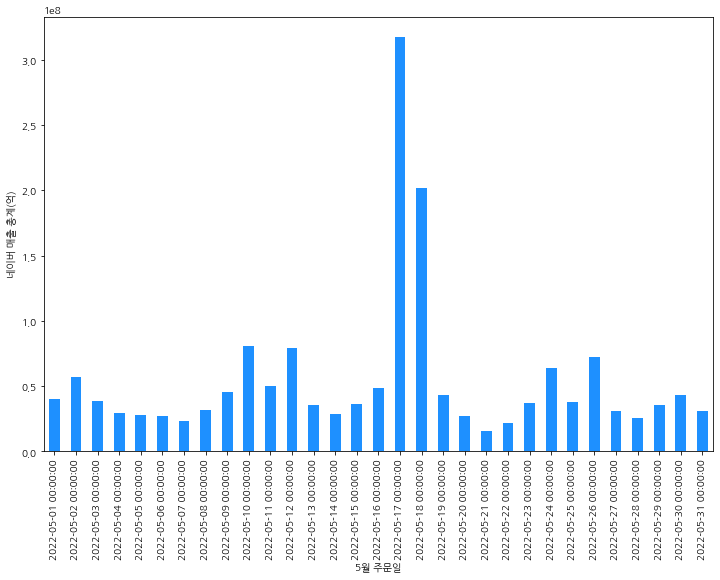

In [35]:
# 거래처 : 11번가 >> 5월 주문일 별 매출액 추이

dfs = {}
df_naver = main[main['거래처'] == 1]
df_naver_may = df_naver[df_naver['월'] == 5]

for name, group in df_naver_may.groupby('주문일'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_naver_may.groupby('주문일')['매출액'].sum()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('5월 주문일')
plt.ylabel('네이버 매출 총계(억)')
plt.show()

> **5월 > 네이버 데이터**
<br>H0 : 네이버 데이터에서 5월 주문일 별 평균 매출액이 같다.
<br>H1 : 네이버 데이터에서 5월 주문일 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
<br>네이버 데이터의 5월 주문일 별 매출액 평균이 같지 않으므로, 각 주문일마다 특성이 있다는 사실을 도출할 수 있다.


> **그래프 분석**
<br>5월 주문일 별 네이버 매출 총계 시각화를 통해 '2022-05-17', '2022-05-18'에 매출이 급증한다는 것을 확인하였다. 네이버 매출 급증의 원인이 11번가의 <십일절> 같은 행사로 인한 영향이 아니라고 판단하였다. 네이버 매출 급증의 원인을 할인에 의한 것이라 가정하고 추가적인 분석을 진행해 보았다. 우선 판매량이 급증한 날짜에 어떠한 상품의 판매량이 높았는지 확인하고, 해당 상품의 가격이 다른 날보다 저렴한지 확인해 보겠다.

**<span style="color:blue">네이버 매출 급증 원인 분석</span>**
('2022-05-17', '2022-05-18', '2022-06-10')

In [36]:
df_naver_0517 = df_naver[df_naver['주문일'] == '2022-05-17 00:00:00']
df_naver_0518 = df_naver[df_naver['주문일'] == '2022-05-18 00:00:00']
df_naver_0610 = df_naver[df_naver['주문일'] == '2022-06-10 00:00:00']
df_naver_upserge = pd.concat([df_naver_0517, df_naver_0518, df_naver_0610], ignore_index = True)
df_naver_upserge['상품명'].value_counts().head(5)

햇반210G*24(1입)/상온                              8436
수제진한고기만두400Gx2+수제진한김치만두400Gx2+수제부추새우만두509G    3824
햇반 현미쌀밥 210G x 24개                            2528
햇반 흑미밥 210Gx36개                               2480
햇반 매일찰잡곡밥 210Gx36개                            2389
Name: 상품명, dtype: int64

##### 가장 많이 판매된 '햇반210G*24(1입)/상온'의 가격 데이터를 시각화하여 제품의 가격이 판매량에 영향을 미치는지 확인해보자

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


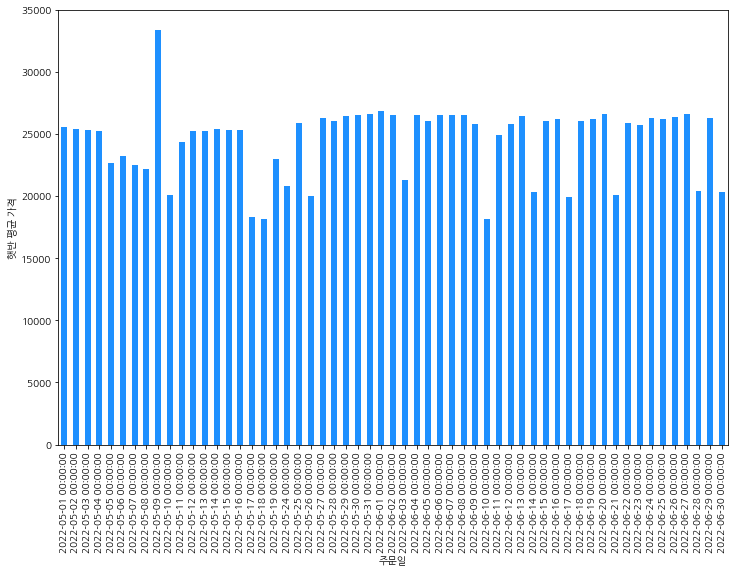

In [37]:
# 네이버 주문일 별 햇반 평균 가격

dfs = {}

df_naver = main[main['거래처'] == 1]
df_naver_hatban = df_naver[df_naver['상품명'] == "햇반210G*24(1입)/상온"]
df_naver_hatban['가격'] = df_naver_hatban['매출액'] / df_naver_hatban['초기자재수량']

for name, group in df_naver_hatban.groupby('주문일'):
    dfs[name] = group
data = [dfa['가격'] for dfa in dfs.values()]

grouped = df_naver_hatban.groupby('주문일')['가격'].mean()
grouped.plot(kind ='bar', x='index', y='values', color='dodgerblue', figsize = (12,8))
plt.xlabel('주문일')
plt.ylabel('햇반 평균 가격')
plt.show()

In [38]:
df_naver_0517_hatban = df_naver_hatban[df_naver_hatban['주문일'] == '2022-05-17 00:00:00']
df_naver_0518_hatban = df_naver_hatban[df_naver_hatban['주문일'] == '2022-05-18 00:00:00']
df_naver_0610_hatban = df_naver_hatban[df_naver_hatban['주문일'] == '2022-06-10 00:00:00']

print("<햇반210G*24(1입)/상온>의 평균 가격:", df_naver_hatban['가격'].mean())
print("5월 17일 <햇반210G*24(1입)/상온>의 평균 가격:",df_naver_0517_hatban['가격'].mean())
print("5월 18일 <햇반210G*24(1입)/상온>의 평균 가격:",df_naver_0518_hatban['가격'].mean())
print("6월 10일 <햇반210G*24(1입)/상온>의 평균 가격:",df_naver_0610_hatban['가격'].mean())

<햇반210G*24(1입)/상온>의 평균 가격: 19827.272468052488
5월 17일 <햇반210G*24(1입)/상온>의 평균 가격: 18305.120441727337
5월 18일 <햇반210G*24(1입)/상온>의 평균 가격: 18149.664890400614
6월 10일 <햇반210G*24(1입)/상온>의 평균 가격: 18123.118986447003


> 위의 시각화한 결과를 통해 **'2022-05-17', '2022-05-18', '2022-06-10'의 <햇반210GX24(1입)/상온> 평균 가격이 전체 평균 가격에 비해 훨씬 저렴하다**는 것을 알 수 있다. 이를 통해 해당 날짜에 할인이 진행되었다는 결론을 낼 수 있으며 이와 연관 지어 마케팅 전략을 세울 수 있다.

>**1. 할인폭**
<br> 그래프를 보면 오직 이날들에만 할인이 진행된 것이 아니라 다른 날들에도 할인이 진행되었다는 것을 알 수 있다. 하지만 <햇반210GX24(1입)/상온> 가격이 18000원대 초반까지 내려갔을 때, 유의미한 매출액 증가 효과를 불러올 수 있다는 결론을 도출할 수 있다.

>**2. 할인 행사 날짜 간격**
<br> 1번의 논리대로라면 <햇반210GX24(1입)/상온>을 항상 18000원대 초반으로 할인하여 판매할 경우, 매출액이 증가할 것이라고 예상할 수 있다. 하지만 '2022-05-17', '2022-05-18' 데이터를 확인해 보면 이는 옳지 않다는 사실을 확인할 수 있다. '2022-05-17'에는 18305원, '2022-05-18'에는 그보다 더 낮은 가격인 18150원이 평균이었음에도 불구하고 매출액은 '2022-05-17'이 훨씬 더 높게 나타난다. 이는 가격을 더 저렴하게 했음에도 불구하고 너무 가까운 간격으로 할인 행사를 진행하게 된다면 매출액은 역으로 감소한다고 분석할 수 있다. 따라서 **항상 할인된 가격으로 판매한다고 매출이 무조건 증가하는 것은 아니며 일정 기간 텀을 두며 할인을 진행하는 것이 더 적합하다**는 결론을 도출할 수 있다.

<br> 이 두 가지 사실을 종합하여 **<span style="color:blue">평소에 가격을 유지하다가 일정한 간격으로 할인 행사를 진행하면 매출이 증가한다</span>**고 결론지을 수 있으며, 이를 적절한 프로모션과 함께 결합시킨다면 더 큰 수익을 창출할 수 있을 것으로 보인다.

### <span style=" background-color:#fff5b1;">**(3) 사은품 여부**</span>
#####  사은품 여부가 매출에 영향을 미치는지 확인해보자

F-value: 119.94742308168856
p-value: 6.567183790154119e-28


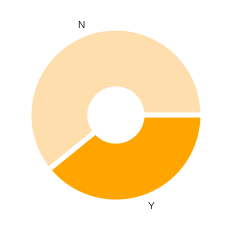

In [39]:
dfs = {}

for name, group in main.groupby('사은품여부'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)

print('F-value:', f_val) 
print('p-value:', p_val) 

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main.groupby('사은품여부')['매출액'].mean()
plt.pie(grouped, labels=['N','Y'], colors=['navajowhite', 'orange'], wedgeprops=wedgeprops)
plt.show()

>**Main Data 대상**
<br>H0 : 사은품 유무와 관계없이 매출액 평균은 같다.
<br>H1 : 사은품 유무에 따라 매출액 평균이 다르다
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 

##### 사은품과 묶여서 판매된 적이 있는 제품을 대상으로 사은품 유무가 매출액에 영향을 끼치는지 확인해 보자

F-value: 642.6464256327174
p-value: 1.825780741375054e-141


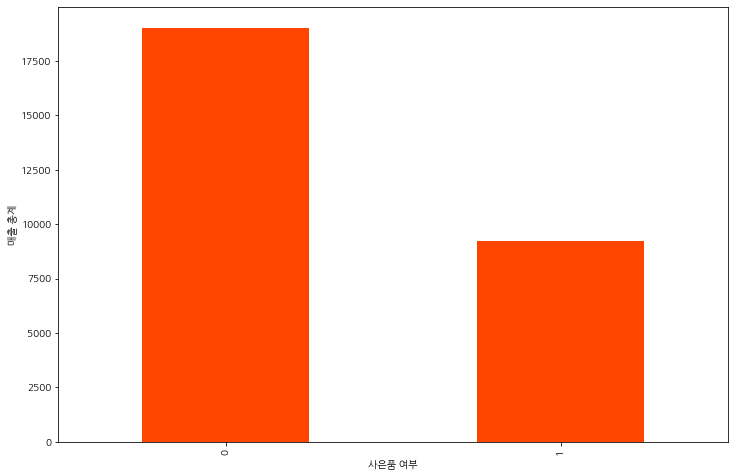

In [40]:
dfs = {}
df_gifts = main[main['사은품여부'] == 1]  # 사은품여부가 1인 df_gifts 생성
code = df_gifts['상품코드'].unique()   # df_gifts의 상품코드 고유값 추출
df_gifts_code = main[main['상품코드'].isin(code)]  # code에 해당하는 행 추출하여 df_gifts_code 생성

for name, group in df_gifts_code.groupby('사은품여부'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)

print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_gifts_code.groupby('사은품여부')['매출액'].mean()
grouped.plot(kind ='bar', x='index', y='values', color='orangered', figsize = (12,8))
plt.xlabel('사은품 여부')
plt.ylabel('매출 총계')
plt.show()

> **사은품과 묶여서 판매된 적이 있는 제품 대상**
<br>H0 : 사은품 유무와 관계없이 평균 매출액이 같다.
<br>H1 : 사은품 유무에 따라 평균 매출액이 다르다
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.

> **그래프 분석**
<br>사은품을 포함시키는 것은 오히려 부정적인 효과를 가진다는 결론을 도출할 수가 있다.

##### 판매량이 적은 상품과 판매량이 많은 상품을 대상으로 사은품 여부가 매출에 영향을 미치는지 다시 한번 분석해 보자

In [41]:
# 판매량이 적은 상품 --> 시럽 
## 소금, 메티에는 유의미한 결과를 가지지 않으므로 '시럽' 이용

main['자재명_분류'].value_counts().tail()

행복한콩    138
산들애     135
시럽      129
소금       96
메티에      22
Name: 자재명_분류, dtype: int64

In [42]:
# 판매량이 많은 상품 --> 비비고

main['자재명_분류'].value_counts().head()

비비고    118513
햇반      99561
다담      39190
고메      30137
백설      16364
Name: 자재명_분류, dtype: int64

F-value: 0.0015630910667322128
p-value: 0.9685251780760538


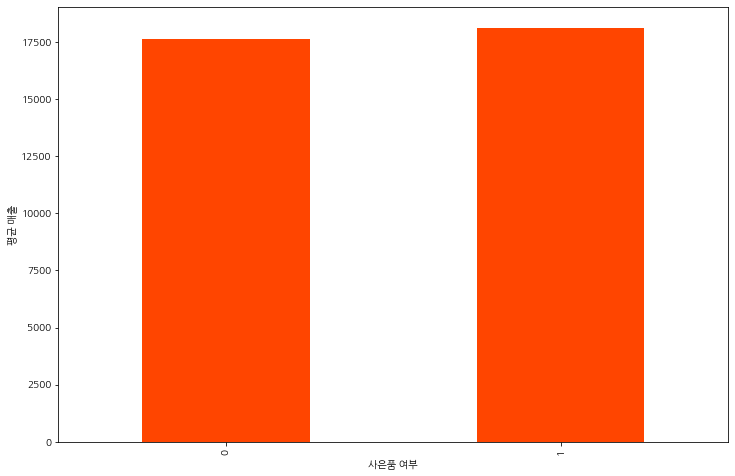

In [43]:
dfs = {}
df_syrup = main[main['자재명_분류'] ==  "시럽"]

for name, group in df_syrup.groupby('사은품여부'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]
f_val, p_val = f_oneway(*data)

print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_syrup.groupby('사은품여부')['매출액'].mean()
grouped.plot(kind ='bar', x='index', y='values', color='orangered', figsize = (12,8))
plt.xlabel('사은품 여부')
plt.ylabel('평균 매출')
plt.show()

> **자재명 분류 : '시럽' 대상**
<br>H0 : 사은품 유무와 관계없이 평균 매출액이 같다.
<br>H1 : 사은품 유무에 따라 평균 매출액이 다르다
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다.
<br>p-value가 0.96로 1에 굉장히 근접한 값을 가지므로, 이를 통해 판매량이 적은 제품은 사은품 유무와 관계없이 평균 매출액이 비슷하다는 결론을 도출할 수 있다.

F-value: 5.385623029953535
p-value: 0.02030502539649957


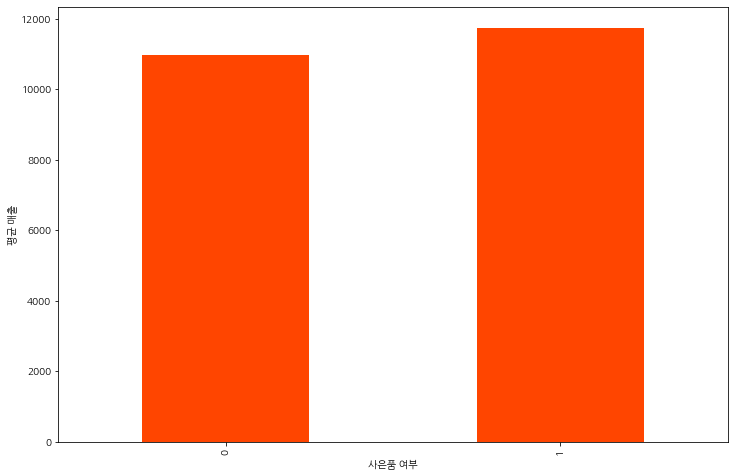

In [44]:
dfs = {}
df_bibigo = main[main['자재명_분류'] == '비비고']

for name, group in df_bibigo.groupby('사은품여부'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_bibigo.groupby('사은품여부')['매출액'].mean()
grouped.plot(kind ='bar', x='index', y='values', color='orangered', figsize = (12,8))
plt.xlabel('사은품 여부')
plt.ylabel('평균 매출')
plt.show()

> **자재명 분류 : '비비고' 대상**
<br>H0 : 사은품 유무와 관계없이 평균 매출액이 같다.
<br>H1 : 사은품 유무에 따라 평균 매출액이 다르다
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.

> **그래프 해석**
<br>사은품을 포함한 제품의 평균 매출액이 포함하지 않은 제품의 평균 매출액보다 높게 나타났다. 전체 데이터 대상으로 한 분석에서는 사은품이 포함되었을 경우 오히려 부정적인 영향을 미친다는 결론이 나왔지만, '비비고'과 같이 **판매량이 많은 상품에 사은품을 제공하면 긍정적인 영향을 미친다**는 것을 파악할 수가 있다. 이것을 통해서 판매량이 많은 상품을 대상으로 사은품을 제공하는 마케팅 전략을 세울 수 있다.

### <span style=" background-color:#fff5b1;">**(4) 상품유형**

F-value: 4679.908236390688
p-value: 0.0


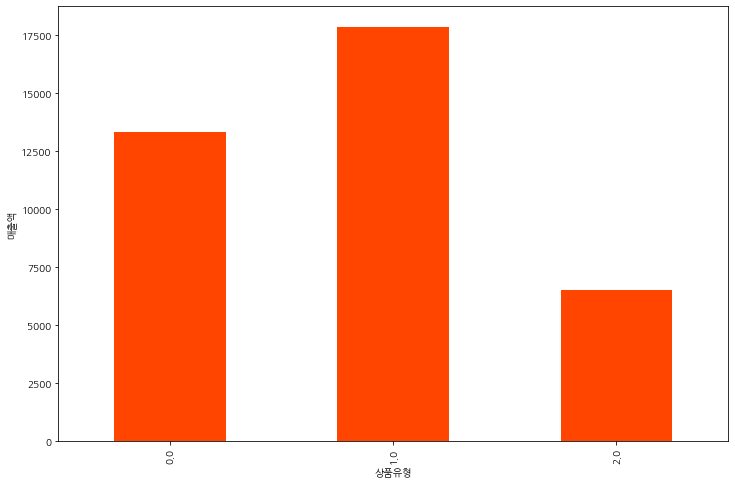

In [45]:
dfs = {}

for name, group in main.groupby('상품유형'):
    dfs[name] = group
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)

print('F-value:', f_val)
print('p-value:', p_val)

grouped = main.groupby('상품유형')['매출액'].mean()
grouped.plot(kind ='bar', x='index', y='values', color='orangered', figsize = (12,8))
plt.xlabel('상품유형')
plt.ylabel('매출액')
plt.show()

>H0 : 상품유형에 관계없이 평균 매출액이 같다.
<br>H1 : 상품유형에 따라 평균 매출액이 다르다
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.

> **그래프 해석**
<br> 묶음 상품의 평균 매출액이 가장 높게 나타나고, 다음으로 단일 상품의 평균 매출액이 높게 나타난다. 복합 상품은 단일 상품이나 묶음 상품에 비해 평균 판매량이 낮게 나타난다. 묶음 상품의 경우 추후에 몇 개 묶음으로 판매해야 가장 수요가 높은지 분석할 예정이다.

**<span style="color:blue">단일, 묶음 상품 vs 복합 상품 </span>**

In [46]:
# main data에서 df_single, df_complex 생성

df_single = main[(main['상품유형'].isin([0,1]))] # 단일 상품, 묶음 상품
df_complex = main[(main['상품유형'] == 2)] # 복합 상품

##### 복합 상품 상위 5개 제품 판매량을 단일, 묶음 상품 판매량과 비교 분석해보자
- **단일, 묶음 상품의 경우 자재명**으로, **복합 상품의 경우 상품명**으로 분석
    - 복합 상품을 자재명으로 분석할 경우, 포함된 모든 제품을 알 수 없기 때문이다.

In [47]:
# 복합 상품 상위 5개 제품 판매량
df_complex['상품명'].value_counts().head(5)

다담/순두부찌개 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개       6653
수제진한고기만두400Gx2+수제진한김치만두400Gx2+수제부추새우만두509G           4475
햇반솥반 전 제품(8종) 체험팩                                    3941
햇반 솥반 대용량 구성(전제품) 총 21개                              2565
다담/우렁강된장 비빔 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개    2476
Name: 상품명, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


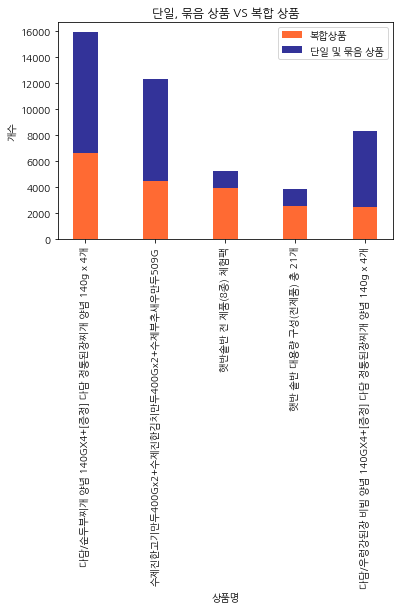

In [48]:
# 두 개의 데이터를 pandas DataFrame으로 변환

complex = {'Product': ['다담/순두부찌개 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개', 
                     '수제진한고기만두400Gx2+수제진한김치만두400Gx2+수제부추새우만두509G', 
                     '햇반솥반 전 제품(8종) 체험팩', 
                     '햇반 솥반 대용량 구성(전제품) 총 21개', 
                     '다담/우렁강된장 비빔 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개'], 
          'Count': [6653, 4475, 3941, 2565, 2476]}

single = {'Product': ['다담/순두부찌개 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개', 
                     '수제진한고기만두400Gx2+수제진한김치만두400Gx2+수제부추새우만두509G', 
                     '햇반솥반 전 제품(8종) 체험팩', 
                     '햇반 솥반 대용량 구성(전제품) 총 21개', 
                     '다담/우렁강된장 비빔 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개'], 
          'Count': [6283+3011, 7847, 1290, 1290, 2827+3011]}

df1 = pd.DataFrame(complex)
df2 = pd.DataFrame(single)

# 데이터 시각화
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(df1['Product'], df1['Count'], bar_width, alpha=opacity, color='orangered', label='복합상품')
rects2 = plt.bar(df2['Product'], df2['Count'], bar_width, alpha=opacity, color='navy', label='단일 및 묶음 상품', bottom=df1['Count'])

plt.xlabel('상품명')
plt.ylabel('개수')
plt.title('단일, 묶음 상품 VS 복합 상품')
plt.xticks(rotation=90) # 상품명이 길기 때문에 x축 레이블을 90도 회전
plt.legend()
plt.tight_layout()
plt.show()

> - **'다담/순두부찌개 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개'** 제품의 경우, 복합 상품과 단일+묶음 상품 판매량을 비교하였을 때 큰 차이를 보이지 않는다. 
- **'수제진한고기만두400Gx2+수제진한김치만두400Gx2+수제부추새우만두509G'** 제품의 경우, 복합 상품과 단일+묶음 상품 판매량을 비교하였을 때, 단일+묶음 상품 판매량이 조금 더 우세하게 나타난다. 복합상품 판매량도 저조하진 않지만, 수제 만두의 경우 단일+묶음 상품으로 파는 마케팅을 하는 게 더 효과적으로 보인다.
- **'햇반솥반 전 제품(8종) 체험팩', '햇반 솥반 대용량 구성(전제품) 총 21개'** 제품의 경우, 압도적으로 복합 상품 판매량이 우세하다. 따라서 햇반의 솥반 제품은 복합 상품으로 파는 것이 효과적일 것이다.
- **'다담/우렁강된장 비빔 양념 140GX4+[증정] 다담 정통된장찌개 양념 140g x 4개'** 제품의 경우, 단일+묶음 상품 판매량이 더 우세하게 나타난다. 다담의 제품을 복합 제품으로 묶어파는 것이 효과적일 것이라고 예상했지만, 어떤 제품을 복합 제품으로 묶냐에 따라 판매량이 더 저조해질 수 있다는 점을 유의해야 할 것이다.  

### <span style=" background-color:#fff5b1;">**(5) 자재명_분류**

In [49]:
main['자재명_분류'].value_counts().head(5)

비비고    118513
햇반      99561
다담      39190
고메      30137
백설      16364
Name: 자재명_분류, dtype: int64

**판매량이 많은 상위 5개의 자재명_분류(비비고, 백설, 다담, 햇반, 고메)를 집중적으로 분석하기 위하여 자재명을 기반으로 추가적인 세분화를 진행**


<span style=" background-color:#ffdce0;">**비비고**</span>

In [50]:
df_bibigo = main[main['자재명_분류'] == '비비고']

df_bibigo_dumpling = df_bibigo[df_bibigo['자재명'].str.contains('교자|만두')]
df_bibigo_soup = df_bibigo[df_bibigo['자재명'].str.contains('탕|미역국|백숙|육개장|감자탕|황태국|칼국수|장터국|추어탕|육수')]
df_bibigo_side = df_bibigo[df_bibigo['자재명'].str.contains('잡채|동그랑땡|김치|가자미|삼치|고등어|장조림|떡갈비|불고기|멸치')]
df_bibigo_bab = df_bibigo[df_bibigo['자재명'].str.contains('밥|죽|비빔밥|볶음밥')]

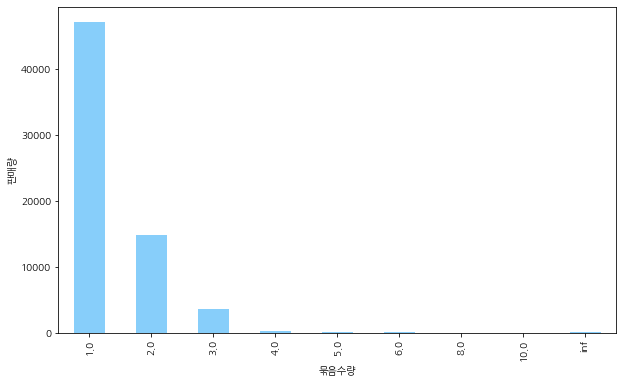

In [51]:
# 비비고 만두 --> 묶음 수량 변곡점 확인
grouped = df_bibigo_dumpling.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 비비고 만두 제품의 경우, 단일 상품이나 2개 묶음 상품으로 파는 것이 효과적이다.

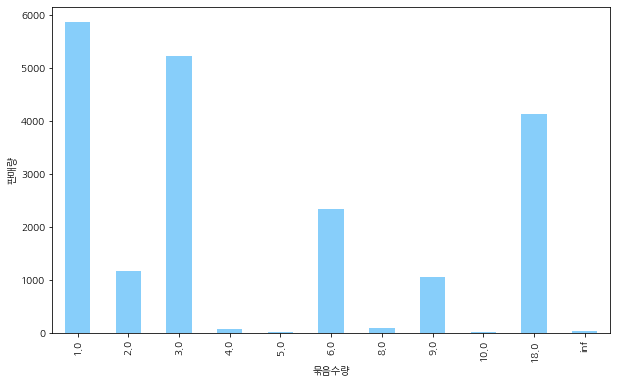

In [52]:
# 비비고 국 --> 묶음 수량 변곡점 확인
grouped = df_bibigo_soup.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 비비고 국 제품의 경우, 1개 > 3개 > 18개 > 6개 묶음 순으로 많이 판매된다.

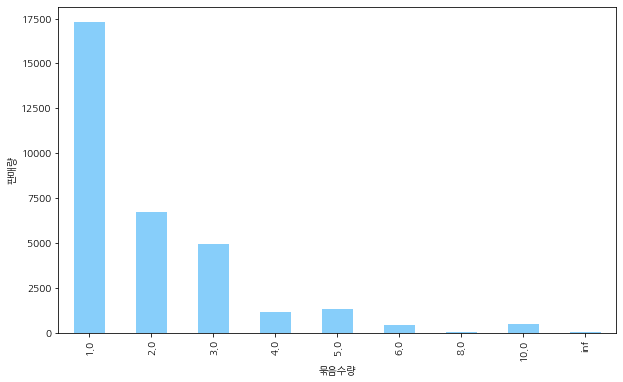

In [53]:
# 비비고 반찬 --> 묶음 수량 변곡점 확인
grouped = df_bibigo_side.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 비비고 반찬 제품의 경우, 묶음 수량을 증가시킬 시에 오히려 판매량이 줄어들기 때문에 단일 상품으로 판매하는 것이 더 효율적이다.

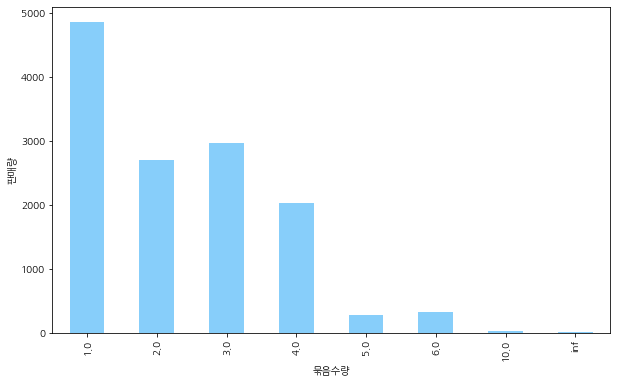

In [54]:
# 비비고 밥 --> 묶음 수량 변곡점 확인
grouped = df_bibigo_bab.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 비비고 밥 제품의 경우, 묶음 수량 4개까지 판매량이 높으며 그 이상은 수요가 적기 때문에 5개 이상 묶음 상품으로 파는 것은 비효율적으로 여겨진다.

<span style=" background-color:#ffdce0;">**백설**</span>

In [55]:
# 백설 세분화
df_baek = main[main['자재명_분류'] == '백설']

df_baek_oil = df_baek[df_baek['자재명'].str.contains('기름|올리브유|씨유|요리유|옥수수유')]
df_baek_ss = df_baek[df_baek['자재명'].str.contains('솔트|설탕|굴소스|소금|올리고당|요리당|식초|소스|양념|맛술|청|시럽|참치액|매실당')]
df_baek_flour = df_baek[df_baek['자재명'].str.contains('가루|중력')]
df_baek_noo = df_baek[df_baek['자재명'].str.contains('당면|스파게티면|소면|소바|중면|국수|고급면')]
df_baek_side = df_baek[df_baek['자재명'].str.contains('비엔나|너비아니|김치전|감자전|햄|말이|밥이랑|후랑크|케익|김가루')]

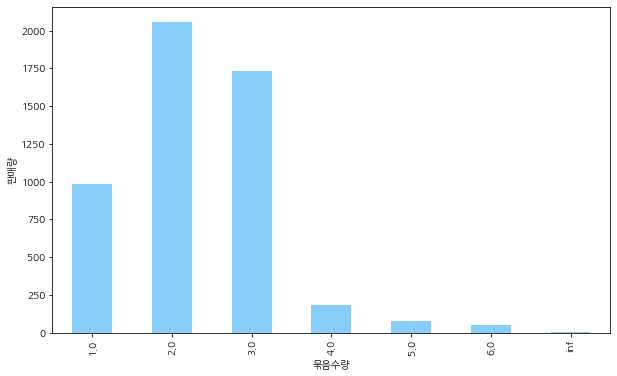

In [56]:
# 백설 기름 --> 묶음 수량 변곡점 확인
grouped = df_baek_oil.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 백설 기름 제품의 경우, 2개 > 3개 > 1개 묶음일 때 가장 많이 판매된다. 따라서 백설 기름 제품은 3개 이하 묶음으로 판매하는 것이 가장 효과적이다.

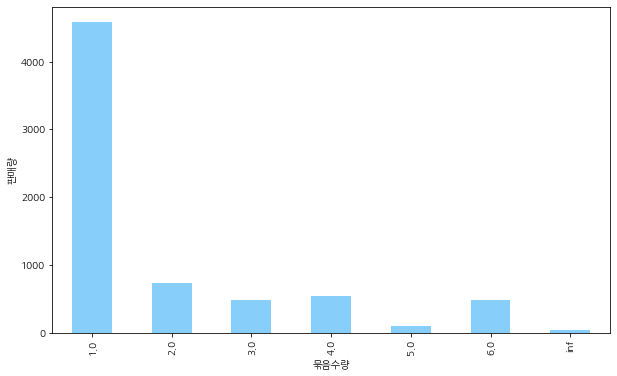

In [57]:
# 백설 조미료 --> 묶음 수량 변곡점 확인
grouped = df_baek_ss.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 백설 조미료 제품의 경우, 단일 상품으로 판매하는 것이 가장 효과적이다.

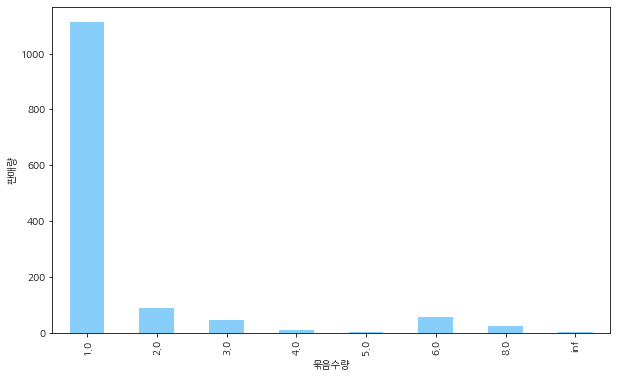

In [58]:
# 백설 가루 --> 묶음 수량 변곡점 확인
grouped = df_baek_flour.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 백설 가루 제품의 경우, 단일 상품으로 판매하는 것이 가장 효과적이다.

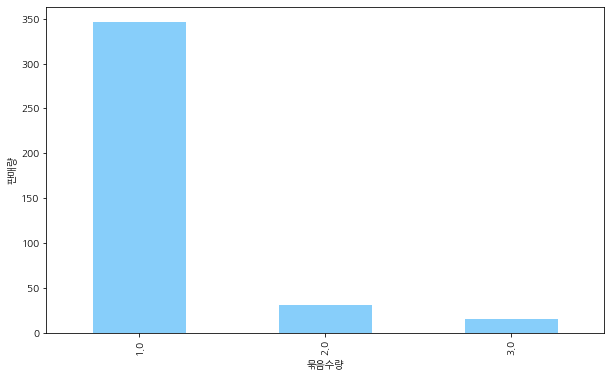

In [59]:
# 백설 면 --> 묶음 수량 변곡점 확인
grouped = df_baek_noo.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 백설 면 제품의 경우, 단일 상품으로 판매하는 것이  가장 효과적이다.

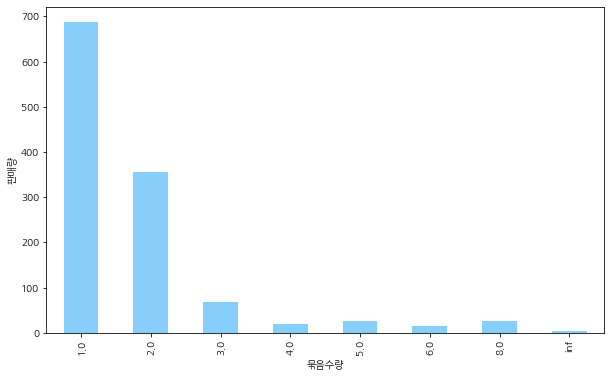

In [60]:
# 백설 반찬 --> 묶음 수량 변곡점 확인
grouped = df_baek_side.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 백설 반찬 제품의 경우, 1개 > 2개 묶음으로 많이 판매된다. 따라서 2개 이하 묶음으로 판매를 진행하는 것이 가장 효과적이다.

<span style=" background-color:#ffdce0;">**다담**</span>

In [61]:
# 다담의 경우 '양념'으로만 이루어져 있어 따로 세분화 진행하지 않음
df_dadam = main[main['자재명_분류'] == '다담']

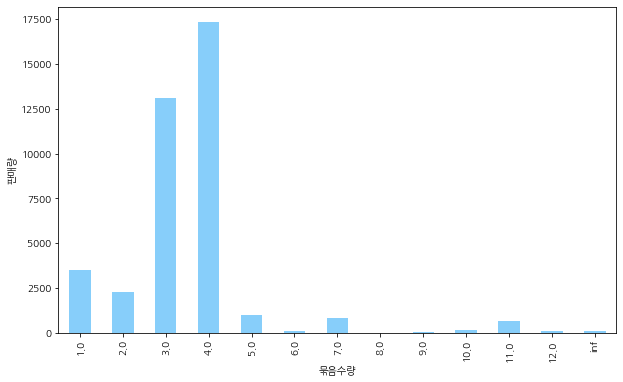

In [62]:
# 다담 --> 묶음수량 변곡점 확인
grouped = df_dadam.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 다담 제품의 경우, 4개 > 3개 묶음 순으로 많이 판매된다. 4개나 3개 묶음 상품으로 파는 것이 효과적이다.

<span style=" background-color:#ffdce0;">**햇반**</span>

In [63]:
# 햇반 세분화
df_bob = main[main['자재명_분류'] == '햇반']

df_bob_already = df_bob[df_bob['자재명'].str.contains('컵반|솥반|쿡반|주먹밥|햇반/갈릭베이컨볶음밥1.23KG/냉동')]
df_bob_bob = df_bob[~df_bob['자재명'].str.contains('컵반|솥반|쿡반|주먹밥|햇반/갈릭베이컨볶음밥1.23KG/냉동')]

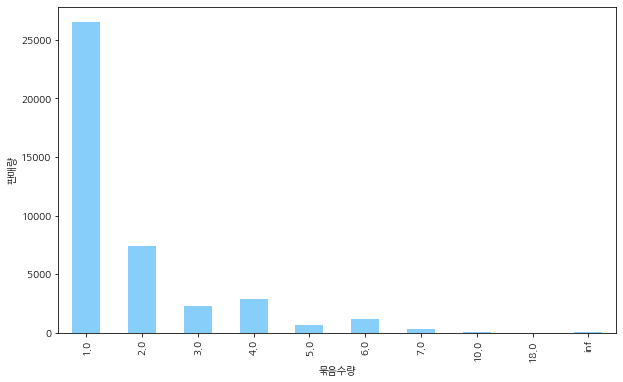

In [64]:
# 햇반 조리된 밥 --> 묶음 수량 변곡점 확인
grouped = df_bob_already.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 햇반 조리된 제품의 경우, 단일제품으로 판매하는 것이 가장 효과적이다.

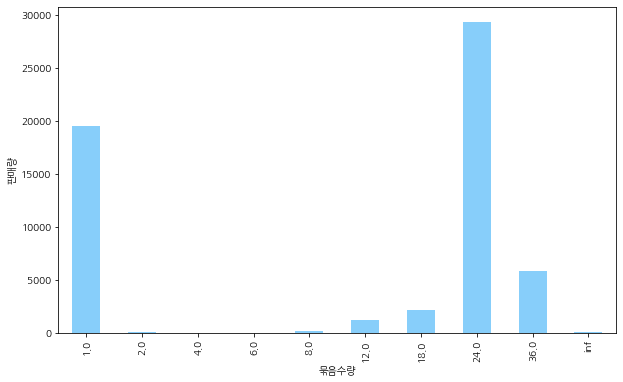

In [65]:
# 햇반 밥 --> 묶음 수량 변곡점 확인
grouped = df_bob_bob.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 햇반 밥 제품의 경우, 24개 > 1개 묶음 순으로 많이 판매된다. 따라서 24개 묶음 상품으로 판매하거나 단일 상품으로 판매하는 것이 가장 효과적이다.

<span style=" background-color:#ffdce0;">**고메**</span>

In [66]:
# 고메 세분화
df_gomet = main[main['자재명_분류'] == '고메']

df_gomet_pizza = df_gomet[df_gomet['자재명'].str.contains('피자')]
df_gomet_fried = df_gomet[df_gomet['자재명'].str.contains('카츠|너겟|핫도그|치킨')]
df_gomet_chs = df_gomet[df_gomet['자재명'].str.contains('짬뽕|짜장|해물|깐풍기|탕수육|중화|볶음밥')]
df_gomet_bakery = df_gomet[df_gomet['자재명'].str.contains('베이커리|치즈볼')]
df_gomet_west = df_gomet[df_gomet['자재명'].str.contains('스테이크|미트볼')]

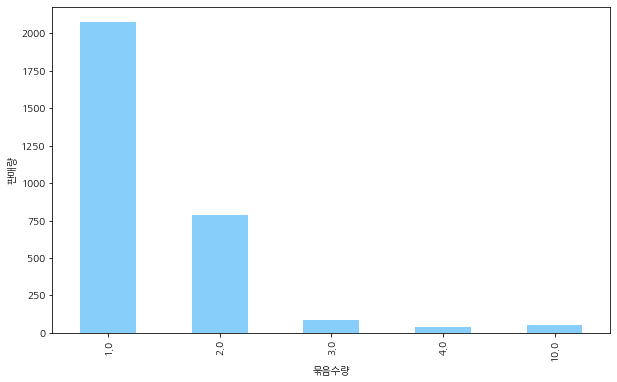

In [67]:
# 고메 피자 --> 묶음 수량 변곡점 확인
grouped = df_gomet_pizza.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 고메 피자 제품의 경우, 묶음 수량 개수가 많아질수록 판매량이 줄어든다. 따라서 2개 이하 묶음 상품으로 판매하는 것이 효과적이다.

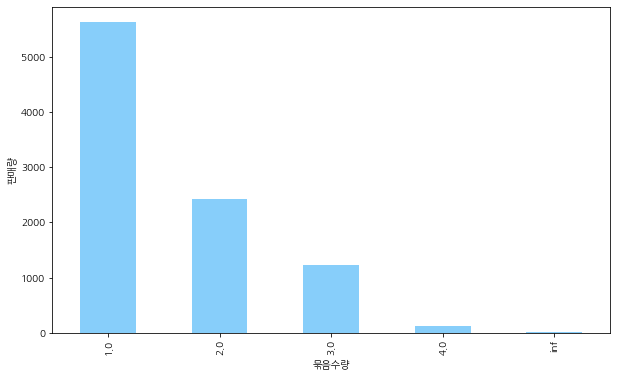

In [68]:
# 고메 튀김류 --> 묶음 수량 변곡점 확인
grouped = df_gomet_fried.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 고메 튀김 제품의 경우, 묶음 수량 개수가 많아질수록 판매량이 줄어든다. 따라서 2개 이하 묶음 상품으로 판매하는 것이 효과적이다.

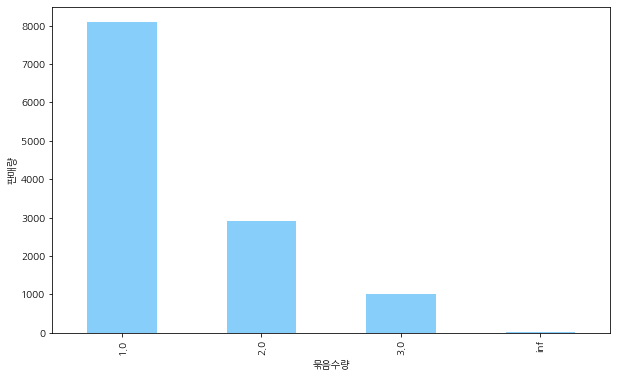

In [69]:
# 고메 중화 --> 묶음 수량 변곡점 확인
grouped = df_gomet_chs.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 고메 중화 제품의 경우, 묶음 수량 개수가 많아질수록 판매량이 줄어든다. 따라서 2개 이하 묶음 상품으로 판매하는 것이 효과적이다.

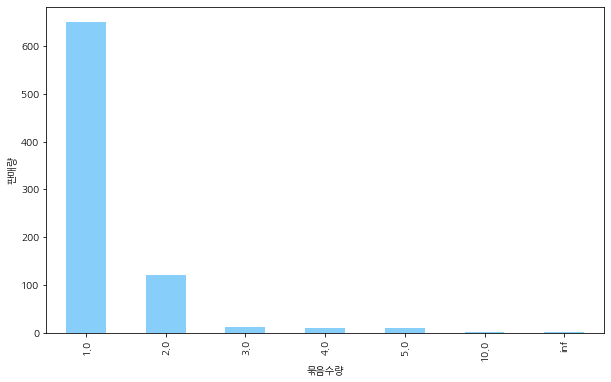

In [70]:
# 고메 베이커리 --> 묶음 수량 변곡점 확인
grouped = df_gomet_bakery.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 고메 베이커리 제품의 경우, 1개 묶음으로 가장 많이 판매됨

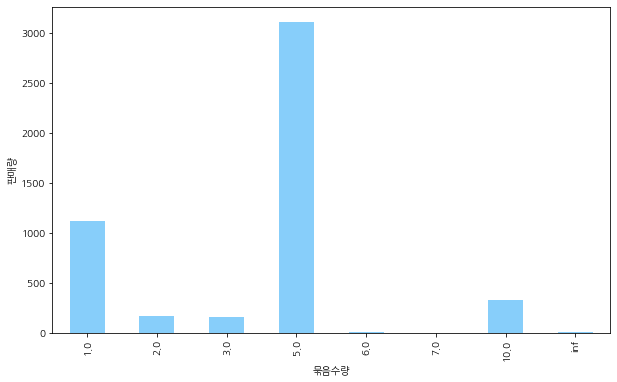

In [71]:
# 고메 양식 --> 묶음 수량 변곡점 확인
grouped = df_gomet_west.groupby('묶음수량')['매출액'].count()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='lightskyblue', figsize = (10,6))
plt.ylabel('판매량')
plt.show()

> #### 고메 양식 제품의 경우, 5개 묶음 상품으로 판매하는 것이 가장 효과적이다.

### <span style=" background-color:#fff5b1;">**(6) 마감구분**

F-value: 11317.544947923221
p-value: 0.0


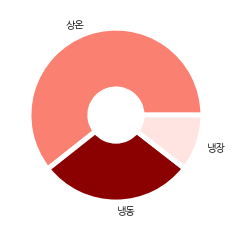

In [72]:
dfs = {}

for name, group in main.groupby('마감구분'):
    dfs[name] = group

data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main.groupby('마감구분')['매출액'].sum()
plt.pie(grouped, labels=['상온','냉동','냉장'], colors=['salmon','darkred','mistyrose'], wedgeprops=wedgeprops)
plt.show()

> H0 : 마감구분 별 평균 매출액이 같다
<br>H1 : 마감구분 별 평균 매출액이 같지 않다. 
<br>ANOVA Test 진행 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 
<br>마감구분 별 매출액 평균이 다르므로 상온, 냉동, 냉장 제품 간 판매되는 제품에 차이가 있음을 알 수 있다.

In [73]:
# 마감구분 별 데이터 분류
main_outside = main[(main['마감구분'] == 0)] # 상온
main_frozen = main[(main['마감구분'] == 1)] # 냉동
main_fridge = main[(main['마감구분'] == 2)] # 냉장

##### 상온, 냉동, 냉장에 따라 주로 이용되는 거래처에 차이가 있는지 알아보자

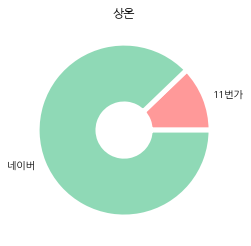

In [74]:
# 상온 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main_outside.groupby('거래처')['매출액'].sum()
plt.pie(grouped, labels=['11번가','네이버'], colors=['#ff9999','#8fd9b6'], wedgeprops=wedgeprops)
plt.title("상온")
plt.show()

> 상온 상품 대부분의 매출은 네이버에서 나온다는 점을 통해 상온 상품은 네이버에서 판매해야 매출액에 긍정적인 효과를 불러온다고 결론 지을 수가 있다.

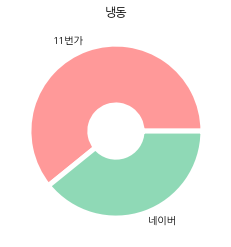

In [75]:
# 냉동
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main_frozen.groupby('거래처')['매출액'].sum()
plt.pie(grouped, labels=['11번가','네이버'], colors=['#ff9999','#8fd9b6'], wedgeprops=wedgeprops)
plt.title("냉동")
plt.show()

> 냉동 상품 대부분의 매출은 11번가에서 나온다는 점을 통해서 냉동 상품은 11번가에서 판매해야 매출액에 긍정적인 효과를 불러온다는 결론을 지을 수가 있다.

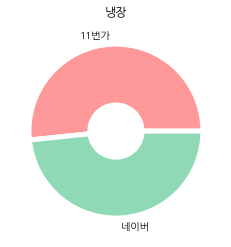

In [76]:
# 냉장
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
grouped = main_fridge.groupby('거래처')['매출액'].sum()
plt.pie(grouped, labels=['11번가','네이버'], colors=['#ff9999','#8fd9b6'], wedgeprops=wedgeprops)
plt.title("냉장")
plt.show()

> 냉장 상품 대부분의 매출은 11번가에서 나온다는 점을 통해서 냉장들은 11번가에서 판매해야 매출액에 긍정적인 효과를 불러온다는 결론을 지을 수가 있다.

##### 상온, 냉동, 냉장에 따라 묶음수량 개수에 변화가 있는지 살펴보자

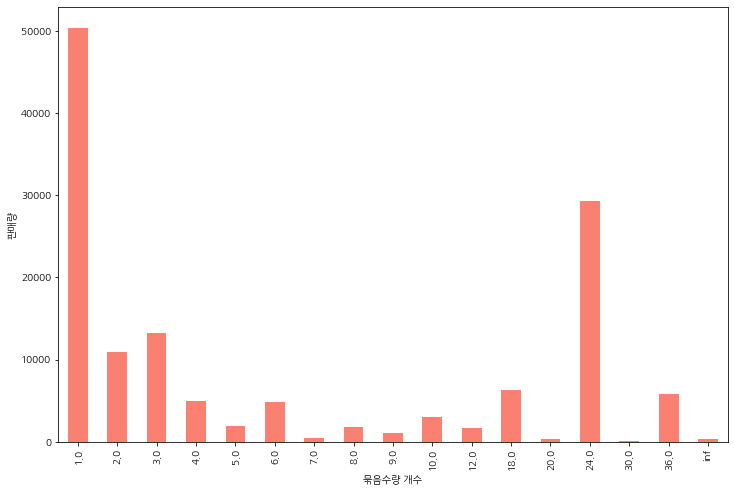

In [77]:
# 상온 --> 묶음수량 변곡점 확인
dfs = {}
grouped = main_outside.groupby('묶음수량')['매출액'].count()
grouped.plot(kind ='bar', x='index', y='values', color='salmon', figsize = (12,8))
plt.xlabel('묶음수량 개수')
plt.ylabel('판매량')
plt.show()

> 상온 상품은 단일상품 또는 24개 묶음 상품으로 판매하는 것이 매출액 증가에 가장 효과적이다.

F-value: 6871.7754269224815
p-value: 0.0


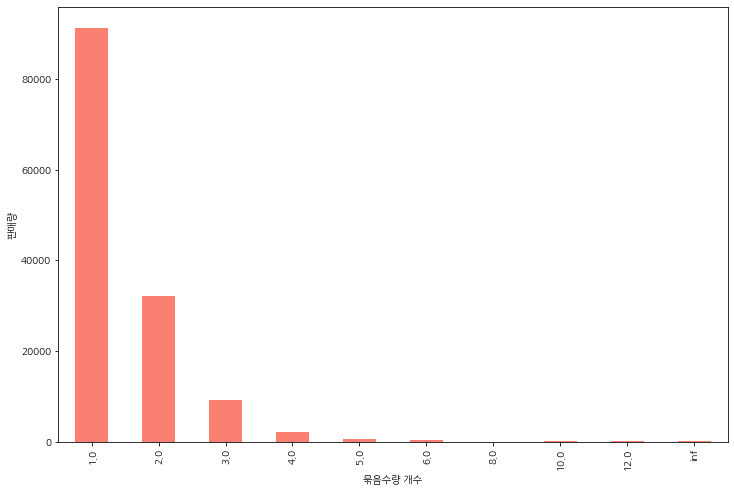

In [78]:
# 냉동 --> 묶음수량 변곡점 확인
dfs = {}

for name, group in main_frozen.groupby('묶음수량'):
    dfs[name] = group
    
data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = main_frozen.groupby('묶음수량')['매출액'].count()
grouped.plot(kind ='bar', x='index', y='values', color='salmon', figsize = (12,8))
plt.xlabel('묶음수량 개수')
plt.ylabel('판매량')
plt.show()

> 냉동 상품은 묶음수량 개수가 늘어날수록 판매량이 줄어든다. 따라서 단일 상품이나 2개 묶음 상품으로 판매하는 것이 가장 효과적이다.

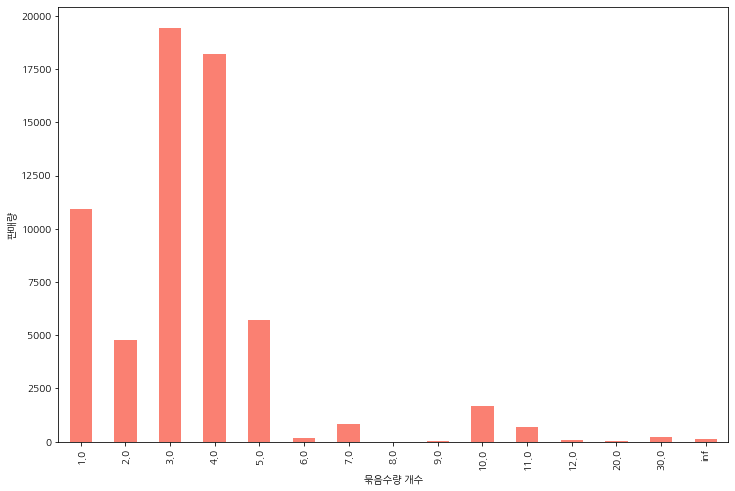

In [79]:
# 냉장 --> 묶음수량 변곡점 확인
grouped = main_fridge.groupby('묶음수량')['매출액'].count()
grouped.plot(kind ='bar', x='index', y='values', color='salmon', figsize = (12,8))
plt.xlabel('묶음수량 개수')
plt.ylabel('판매량')
plt.show()

> 냉장식품들은 묶음수량 5개까지 판매하는 것이 매출액 증가에 가장 효과적이다.

### <span style=" background-color:#fff5b1;">**(7) 거래처주문번호**
- 거래처 주문번호로 그룹화하여 단일 상품을 복합상품으로, 더 효과적인 상품 구성 기획

In [80]:
is_multiple_dict = main['거래처주문번호'].value_counts() > 1

main['동시구매여부'] = main['거래처주문번호'].map(is_multiple_dict).astype(int)
main['동시구매여부'].value_counts()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    256331
0     78993
Name: 동시구매여부, dtype: int64

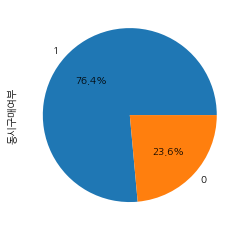

In [81]:
main['동시구매여부'].value_counts().plot(kind='pie',  autopct='%1.1f%%')
plt.show()

In [82]:
multiple_data = main[main['동시구매여부'] == 1]
multiple_data['자재명'].value_counts().head(10)

CJ비비고왕교자455G*2EA/냉동          12905
다담/정통된장찌개양념 140G/24입/냉장      10647
CJ비비고왕교자1.05KG/냉동            10508
다담/순두부찌개양념 140G/24입/냉장        9656
A)햇반/쿡반 김치치즈주먹밥 500G/냉동       7457
CJ비비고김치왕교자420G*2EA/냉동         5934
비비고/수제진한김치만두400G*2/번들/냉동      5074
비비고/수제진한고기만두400G*2_R/번들/냉     4600
A)햇반/쿡반 불고기주먹밥500G/냉동         3962
비비고/부추새우만두509G/냉동             3778
Name: 자재명, dtype: int64

In [83]:
multiple_data_161436 = multiple_data[multiple_data['자재명'] == 'CJ비비고왕교자455G*2EA/냉동']
number_161436 = multiple_data_161436['거래처주문번호']
lst = []
for number in number_161436:
    df_for_loop = multiple_data[multiple_data['거래처주문번호'] == number]
    for index, row in df_for_loop.iterrows():
        if str(row['자재명']) != 'CJ비비고왕교자455G*2EA/냉동':
            lst.append(row['자재명'])
df_161436_multiple = pd.Series(lst)

In [84]:
unique_161436_multiple = df_161436_multiple.unique()
df_all_161436_multiple = multiple_data[multiple_data['자재명'].isin(unique_161436_multiple) & multiple_data['거래처주문번호'].isin(number_161436)]
df_all_161436_multiple['자재명'].value_counts().head(10)

CJ비비고왕교자1.05KG/냉동            4942
CJ비비고김치왕교자420G*2EA/냉동        2984
비비고/수제깔끔고기만두400G*2/번들/냉동     1478
비비고/수제진한고기만두400G*2_R/번들/냉    1012
비비고/수제진한김치만두400G*2/번들/냉동      976
비비고/수제군교자 360G*2EA/번들/냉동      854
비비고/매운왕교자 385G*2EA/냉동         821
비비고/부추새우만두509G/냉동             672
비비고/플랜테이블왕교자420G/냉동           537
비비고/수제소고기한섬320G*2/번들/냉동       500
Name: 자재명, dtype: int64

In [85]:
df_all_161436_multiple = df_all_161436_multiple[df_all_161436_multiple['자재명'].isin(['CJ비비고왕교자1.05KG/냉동', 'CJ비비고김치왕교자420G*2EA/냉동', '비비고/수제깔끔고기만두400G*2/번들/냉동', '비비고/수제진한고기만두400G*2_R/번들/냉', '비비고/수제진한김치만두400G*2/번들/냉동'])]

F-value: 371.5518944623887
p-value: 3.04271816014674e-301


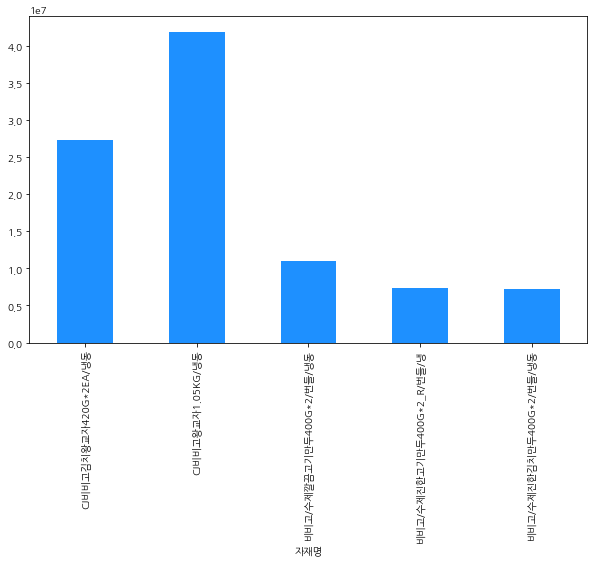

In [86]:
# CJ비비고왕교자455G*2EA/냉동 와 동시 구매한 상품들의 매출액 ANOVA Test 및 시각화
dfs = {}

for name, group in df_all_161436_multiple.groupby('자재명'):
    dfs[name] = group

data = [dfa['매출액'] for dfa in dfs.values()]

f_val, p_val = f_oneway(*data)
print('F-value:', f_val)
print('p-value:', p_val)

grouped = df_all_161436_multiple.groupby('자재명')['매출액'].sum()
grouped.plot(kind = 'bar', x = 'index', y = 'values', color='dodgerblue', figsize = (10,6))

# <span style=" background-color:#F7DDBE;">**3. Sub Data**
## <span style=" background-color:#f1f9ff;">**3-1 Sub Data 추출**
- **sub1** : 
    - 주문/배송상태 > 1(주문취소), 2(배송취소)
    - 클레임 상태 > 1(취소완료)
- **sub2** :
    - 클레임 상태 > 2(반품처리중), 6(반품완료), 8(반품신청)

In [87]:
# sub1, sub2 data 생성
sub1 = df[(df['주문/배송상태'].isin([1,2])) & (df['클레임 상태'] == 1)]
sub2 = df[(df['클레임 상태'].isin([2,6,8]))]

In [88]:
sub1.head()

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,상품순번,상품코드,상품명,...,반품수량,마감구분,월,운송장등록날짜,운송장등록시간,출고날짜오차,예상출고소요기간,실제출고소요기간,자재명_분류,묶음수량
9,0,20220531450181620,2022-05-31,0,2022-06-02,1,1,11,40057951,[11번가] CJ비비고왕교자1.05KG냉동,...,0,1,5,NaT,None,NaT,2 days,NaT,비비고,1.0
10,0,20220531450181620,2022-05-31,0,2022-06-02,1,1,12,30245002,[11번가] 비비고 왕교자 455GX2봉,...,0,1,5,NaT,None,NaT,2 days,NaT,비비고,1.0
11,0,20220531450181620,2022-05-31,0,2022-06-02,1,1,13,30221930,[11번가] CJ비비고왕교자455G*2EAx2개,...,0,1,5,NaT,None,NaT,2 days,NaT,비비고,2.0
22,0,20220531450174177,2022-05-31,0,2022-06-02,1,1,11,40031631,[11번가]제일제면소 코다리냉면 2인분,...,0,2,5,NaT,None,NaT,2 days,NaT,냉면,1.0
23,0,20220531450174177,2022-05-31,0,2022-06-02,1,1,12,40031631,[11번가]제일제면소 코다리냉면 2인분,...,0,2,5,NaT,None,NaT,2 days,NaT,냉면,1.0


In [89]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8569 entries, 9 to 344495
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   거래처       8569 non-null   int64          
 1   거래처주문번호   8569 non-null   object         
 2   주문일       8569 non-null   datetime64[ns] 
 3   사은품여부     8569 non-null   int64          
 4   출고예정일     8569 non-null   datetime64[ns] 
 5   주문/배송상태   8569 non-null   int64          
 6   클레임 상태    8569 non-null   int64          
 7   상품순번      8569 non-null   int64          
 8   상품코드      8569 non-null   object         
 9   상품명       8569 non-null   object         
 10  상품수량      8569 non-null   int64          
 11  상품유형      8414 non-null   float64        
 12  매출액       8569 non-null   int64          
 13  자재코드      8569 non-null   int64          
 14  자재명       8414 non-null   object         
 15  초기자재수량    8569 non-null   int64          
 16  주문수량      8569 non-null   int64         

In [90]:
sub2.head()

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,상품순번,상품코드,상품명,...,반품수량,마감구분,월,운송장등록날짜,운송장등록시간,출고날짜오차,예상출고소요기간,실제출고소요기간,자재명_분류,묶음수량
922,0,20220530449468701,2022-05-30,0,2022-11-03,0,2,21,40030347,[11번가]우리쌀태 골드고추장1kgX1개 + 골드고추장 500gX2개,...,2,0,5,2022-06-09,15:24:04,-147 days,157 days,10 days,고추장,2.0
923,0,20220530449468701,2022-05-30,0,2022-11-03,0,2,21,40030347,[11번가]우리쌀태 골드고추장1kgX1개 + 골드고추장 500gX2개,...,1,0,5,2022-06-09,15:24:04,-147 days,157 days,10 days,고추장,1.0
924,0,20220530449468701,2022-05-30,0,2022-11-03,0,2,11,30244989,[11번가] 백설 다담된장찌개전용530g,...,1,2,5,2022-06-09,15:24:04,-147 days,157 days,10 days,다담,1.0
925,0,20220530449468701,2022-05-30,0,2022-11-03,0,2,12,30244989,[11번가] 백설 다담된장찌개전용530g,...,1,2,5,2022-06-09,15:24:04,-147 days,157 days,10 days,다담,1.0
926,0,20220530449468701,2022-05-30,0,2022-11-03,0,2,13,30262521,[11번가] 다담 된장찌개양념 530g+정통된장찌개양념 140g,...,1,2,5,2022-06-09,15:24:04,-147 days,157 days,10 days,다담,1.0


In [91]:
sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 922 to 342013
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   거래처       528 non-null    int64          
 1   거래처주문번호   528 non-null    object         
 2   주문일       528 non-null    datetime64[ns] 
 3   사은품여부     528 non-null    int64          
 4   출고예정일     528 non-null    datetime64[ns] 
 5   주문/배송상태   528 non-null    int64          
 6   클레임 상태    528 non-null    int64          
 7   상품순번      528 non-null    int64          
 8   상품코드      528 non-null    object         
 9   상품명       528 non-null    object         
 10  상품수량      528 non-null    int64          
 11  상품유형      526 non-null    float64        
 12  매출액       528 non-null    int64          
 13  자재코드      528 non-null    int64          
 14  자재명       526 non-null    object         
 15  초기자재수량    528 non-null    int64          
 16  주문수량      528 non-null    int64        

## <span style=" background-color:#f1f9ff;">**3-2 Sub Data 분석**

### <span style=" background-color:#fff5b1;">**(1) 거래처**

In [92]:
# 거래처 주문취소 비율
eleven_cancel = round((sum(sub1['거래처']==0) / sum(df['거래처'] == 0)) * 100, 2)
naver_cancel = round((sum(sub1['거래처']==1) / sum(df['거래처'] == 1)) * 100, 2)
print('11번가 주문취소 비율 : ' + str(round((sum(sub1['거래처']==0) / sum(df['거래처'] == 0)) * 100, 2)) + '%') # 11번가 주문취소 비율
print('네이버 주문취소 비율 : ' + str(round((sum(sub1['거래처']==1) / sum(df['거래처'] == 1)) * 100, 2)) + '%') # 네이버 주문취소 비율

11번가 주문취소 비율 : 2.19%
네이버 주문취소 비율 : 2.78%


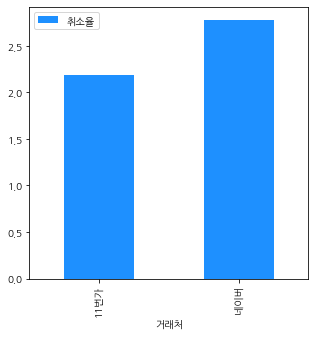

In [93]:
cancel_site_df = pd.DataFrame({'거래처': ['11번가', '네이버'], '취소율': [eleven_cancel, naver_cancel]})
cancel_site_df.plot(kind = 'bar', x = '거래처', y = '취소율', color='dodgerblue', figsize = (5, 5))

In [94]:
#거래처 반품 비율
eleven_return = round((sum(sub2['거래처']==0) / sum(df['거래처'] == 0)) * 100, 2)
naver_return = round((sum(sub2['거래처']==1) / sum(df['거래처'] == 1)) * 100, 2)
print('11번가 반품 비율 : ' + str(round((sum(sub2['거래처']==0) / sum(df['거래처']==0)) * 100, 3)) + '%') # 11번가 반품 비율
print('네이버 반품 비율 : ' + str(round((sum(sub2['거래처']==1) / sum(df['거래처']==1)) * 100, 3)) + '%') # 네이버 반품 비율

11번가 반품 비율 : 0.144%
네이버 반품 비율 : 0.162%


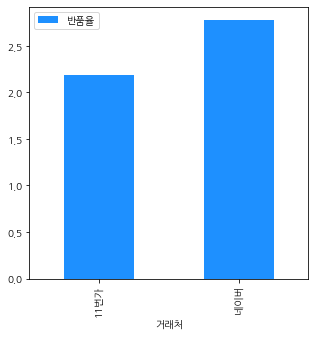

In [95]:
return_site_df = pd.DataFrame({'거래처': ['11번가', '네이버'], '반품율': [eleven_cancel, naver_cancel]})
return_site_df.plot(kind = 'bar', x = '거래처', y = '반품율', color='dodgerblue', figsize = (5, 5))

### <span style=" background-color:#fff5b1;">**(2) 자재명 분류**

In [96]:
# 자재명 분류 주문취소 비율
cancel_group = []
cancel_group_list = []
for name in unique_values:
    cancellation_ratio = round((sum(sub1['자재명_분류'] == name) / sum(df['자재명_분류'] == name)) * 100, 2)
    print('{0} 주문취소 비율: {1:.2f}%'.format(name, cancellation_ratio))
    cancel_group.append(name)
    cancel_group_list.append(cancellation_ratio)

밀당의고수 주문취소 비율: 1.62%
비비고 주문취소 비율: 1.99%
다담 주문취소 비율: 2.49%
고메 주문취소 비율: 1.91%
명가 주문취소 비율: 1.67%
백설 주문취소 비율: 5.33%
냉면 주문취소 비율: 2.44%
스팸 주문취소 비율: 1.45%
쁘띠첼 주문취소 비율: 1.82%
햇반 주문취소 비율: 2.68%
기타 주문취소 비율: 3.25%
드레싱 주문취소 비율: 2.17%
하선정 주문취소 비율: 3.05%
다시다 주문취소 비율: 1.10%
쌈장 주문취소 비율: 2.29%
된장 주문취소 비율: 1.94%
고추장 주문취소 비율: 2.46%
닭가슴살 주문취소 비율: 3.42%
산들애 주문취소 비율: 1.46%
꼬마 주문취소 비율: 2.52%
믹스 주문취소 비율: 1.21%
삼호 주문취소 비율: 2.56%
맥스봉 주문취소 비율: 4.15%
미정당 주문취소 비율: 4.93%
더건강한 주문취소 비율: 2.63%
행복한콩 주문취소 비율: 1.40%
밥이랑 주문취소 비율: 0.48%
소금 주문취소 비율: 4.00%
즐거운동행 주문취소 비율: 3.24%
크레잇 주문취소 비율: 2.75%
0 주문취소 비율: 23.17%
쿡킷 주문취소 비율: 9.01%
밤 주문취소 비율: 3.04%
메티에 주문취소 비율: 4.00%
시럽 주문취소 비율: 3.65%


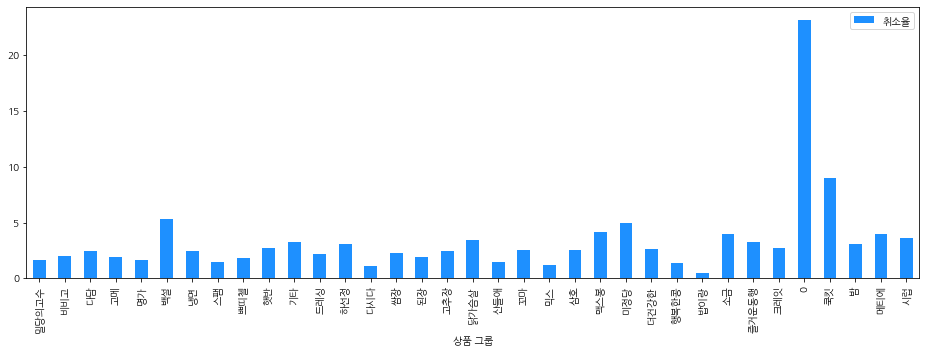

In [97]:
cancel_group_df = pd.DataFrame({'상품 그룹': cancel_group, '취소율': cancel_group_list})
cancel_group_df.plot(kind = 'bar', x = '상품 그룹', y = '취소율', color='dodgerblue', figsize = (16, 5))

> 0은 사은품이며 주문 취소율이 가장 높은 것으로 보면 사은품을 받고 싶지 않은 소비자들이 상당히 많다는 분석을 할 수가 있다.

In [98]:
# 자재명 분류 반품 비율
group_return = []
group_return_list = []
for name in unique_values:
    return_ratio = round((sum(sub2['자재명_분류'] == name) / sum(df['자재명_분류'] == name)) * 100, 3)
    print('{0} 반품 비율: {1:.3f}%'.format(name, return_ratio))
    group_return.append(name)
    group_return_list.append(return_ratio)

밀당의고수 반품 비율: 0.000%
비비고 반품 비율: 0.161%
다담 반품 비율: 0.097%
고메 반품 비율: 0.162%
명가 반품 비율: 0.730%
백설 반품 비율: 0.369%
냉면 반품 비율: 0.070%
스팸 반품 비율: 0.215%
쁘띠첼 반품 비율: 0.038%
햇반 반품 비율: 0.101%
기타 반품 비율: 0.111%
드레싱 반품 비율: 0.000%
하선정 반품 비율: 0.000%
다시다 반품 비율: 0.084%
쌈장 반품 비율: 0.000%
된장 반품 비율: 0.194%
고추장 반품 비율: 0.534%
닭가슴살 반품 비율: 0.352%
산들애 반품 비율: 0.000%
꼬마 반품 비율: 0.000%
믹스 반품 비율: 1.209%
삼호 반품 비율: 1.282%
맥스봉 반품 비율: 0.778%
미정당 반품 비율: 0.448%
더건강한 반품 비율: 0.155%
행복한콩 반품 비율: 2.098%
밥이랑 반품 비율: 0.161%
소금 반품 비율: 0.000%
즐거운동행 반품 비율: 0.000%
크레잇 반품 비율: 0.000%
0 반품 비율: 0.299%
쿡킷 반품 비율: 0.932%
밤 반품 비율: 0.276%
메티에 반품 비율: 0.000%
시럽 반품 비율: 0.730%


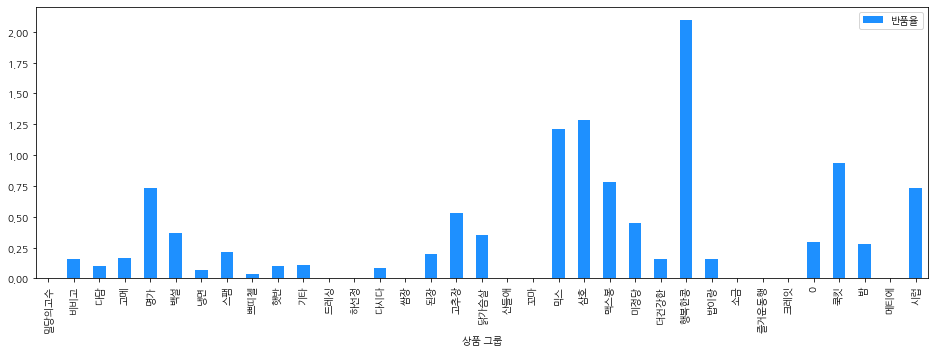

In [99]:
group_return_df = pd.DataFrame({'상품 그룹': group_return, '반품율': group_return_list})
group_return_df.plot(kind = 'bar', x = '상품 그룹', y = '반품율', color='dodgerblue', figsize = (16, 5))

### <span style=" background-color:#fff5b1;">**(3) 예상출고소요기간**

In [100]:
# 예상출고소요기간 기간별 상품 수
lst_expect = []
for value in df['예상출고소요기간']:
    lst_expect.append(int(str(value).split()[0]))
df_lst = pd.DataFrame(lst_expect)

In [101]:
# 주문취소 상품 대상 예상출고소요기간 기간별 상품 수
lst_expect_sum = []
for value in sub1['예상출고소요기간']:
    lst_expect_sum.append(int(str(value).split()[0]))

df_lst_sum = pd.DataFrame(lst_expect_sum)

In [102]:
# 반품 상품 대상 예상출고소요기간 기간별 상품 수
lst_expect_sum2 = []
for value in sub2['예상출고소요기간']:
    lst_expect_sum2.append(int(str(value).split()[0]))

df_lst_sum2 = pd.DataFrame(lst_expect_sum2)

In [103]:
lst_new_new = []
for value in df['예상출고소요기간']:
    lst_new_new.append(int(str(value).split()[0]))
df['예상출고소요기간날짜'] = lst_new_new

lst_new_new = []
for value in sub1['예상출고소요기간']:
    lst_new_new.append(int(str(value).split()[0]))
sub1['예상출고소요기간날짜'] = lst_new_new

lst_new_new = []
for value in sub2['예상출고소요기간']:
    lst_new_new.append(int(str(value).split()[0]))
sub2['예상출고소요기간날짜'] = lst_new_new

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
unique_days = df_lst[0].unique()
unique_days.sort()

In [105]:
# 예상출고소요기간에 따른 주문취소 비율
days_cancel = []
days_cancel_list = []
for day in unique_days:
    day_count = df[df['예상출고소요기간날짜'] == day]
    day_count = day_count['거래처'].count()
    sub_count = sub1[sub1['예상출고소요기간날짜'] == day]
    sub_count = sub_count['거래처'].count()
    if day_count > 0:
        cancellation_ratio = round((sub_count / day_count) * 100, 2)
        print('{0} days 주문취소 비율: {1:.2f}%'.format(day, cancellation_ratio))
        days_cancel.append(day)
        days_cancel_list.append(cancellation_ratio)
    else:
        print('{0} days 주문취소 비율: 0.00%'.format(day))
        days_cancel.append(day)
        days_cancel_list.append(0.00)

0 days 주문취소 비율: 0.00%
1 days 주문취소 비율: 2.10%
2 days 주문취소 비율: 2.19%
3 days 주문취소 비율: 3.80%
4 days 주문취소 비율: 5.13%
5 days 주문취소 비율: 4.01%
6 days 주문취소 비율: 5.73%
7 days 주문취소 비율: 4.70%
8 days 주문취소 비율: 5.14%
9 days 주문취소 비율: 8.45%
10 days 주문취소 비율: 8.98%
11 days 주문취소 비율: 7.81%
12 days 주문취소 비율: 5.65%
13 days 주문취소 비율: 0.93%
14 days 주문취소 비율: 0.00%
15 days 주문취소 비율: 16.67%
16 days 주문취소 비율: 5.63%
17 days 주문취소 비율: 0.00%
18 days 주문취소 비율: 0.00%
19 days 주문취소 비율: 0.00%
20 days 주문취소 비율: 18.18%
21 days 주문취소 비율: 0.00%
22 days 주문취소 비율: 0.00%
23 days 주문취소 비율: 0.00%
25 days 주문취소 비율: 0.00%
27 days 주문취소 비율: 62.50%
29 days 주문취소 비율: 0.00%
31 days 주문취소 비율: 0.00%
32 days 주문취소 비율: 100.00%
34 days 주문취소 비율: 98.18%
35 days 주문취소 비율: 0.00%
36 days 주문취소 비율: 88.89%
37 days 주문취소 비율: 95.24%
38 days 주문취소 비율: 100.00%
39 days 주문취소 비율: 0.00%
40 days 주문취소 비율: 100.00%
41 days 주문취소 비율: 100.00%
42 days 주문취소 비율: 100.00%
48 days 주문취소 비율: 100.00%
62 days 주문취소 비율: 100.00%
118 days 주문취소 비율: 0.00%
157 days 주문취소 비율: 0.00%
162 days 주문취소 비율: 0.00

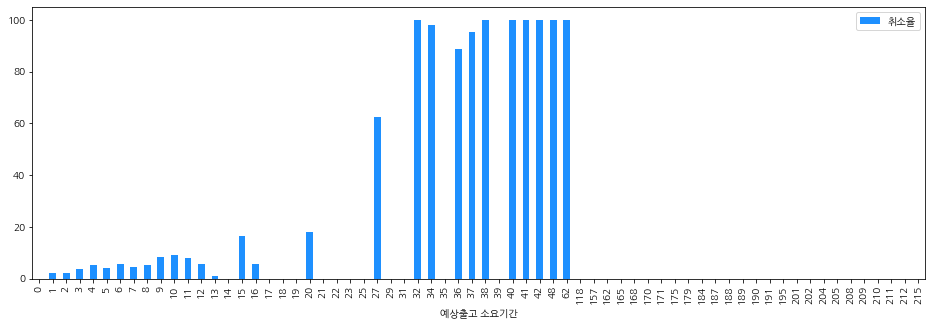

In [106]:
days_cancel_df = pd.DataFrame({'예상출고 소요기간': days_cancel, '취소율': days_cancel_list})
days_cancel_df.plot(kind = 'bar', x = '예상출고 소요기간', y = '취소율', color='dodgerblue', figsize = (16, 5))

예상출고소요기간이 길어질수록 주문취소율이 점점 증가하는 경향을 보인다는 것을 알 수 있다.

### <span style=" background-color:#fff5b1;">**(3) 실제출고소요기간**

In [107]:
# 실제출고소요기간 기간별 상품 수
lst_actual = []
for value in df['실제출고소요기간']:
    lst_actual.append(str(value).split()[0])
df_lst_actual = pd.DataFrame(lst_actual)

In [108]:
# 반품 상품 대상 실제출고소요기간 기간별 상품 수
lst_actual_sum2 = []
for value in sub2['실제출고소요기간']:
    lst_actual_sum2.append(str(value).split()[0])

df_lst_sum2 = pd.DataFrame(lst_actual_sum2)

In [109]:
lst_new_new = []
for value in df['실제출고소요기간']:
    lst_new_new.append(str(value).split()[0])
df['실제출고소요기간'] = lst_new_new

lst_new_new = []
for value in sub2['실제출고소요기간']:
    lst_new_new.append(str(value).split()[0])
sub2['실제출고소요기간'] = lst_new_new

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [110]:
unique_days_unsorted = df_lst_actual[0].unique()
unique_days = []
for value in unique_days_unsorted:
    if value == 'NaT':
        word = value
    else:
        day = int(value)
        unique_days.append(day)
unique_days.sort()
unique_days.append(word)

In [111]:
# 실제출고소요기간에 따른 반품 비율
days_retrieve = []
days_retrieve_list = []
for day in unique_days:
    day_count = df[df['실제출고소요기간'] == str(day)]
    day_count = day_count['거래처'].count()
    sub_count = sub2[sub2['실제출고소요기간'] == str(day)]
    sub_count = sub_count['거래처'].count()
    if day == 'NaT':
        cancellation_ratio = round((sub_count / day_count) * 100, 2)
        print('{0} 반품 비율: {1:.2f}%'.format(day, cancellation_ratio))
        days_retrieve.append(day)
        days_retrieve_list.append(cancellation_ratio)
    elif day_count > 0:
        cancellation_ratio = round((sub_count / day_count) * 100, 2)
        print('{0} days 반품 비율: {1:.2f}%'.format(day, cancellation_ratio))
        days_retrieve.append(day)
        days_retrieve_list.append(cancellation_ratio)
    else:
        print('{0} days 반품 비율: 0.00%'.format(day))
        days_retrieve.append(day)
        days_retrieve_list.append(0.00)

0 days 반품 비율: 0.14%
1 days 반품 비율: 0.10%
2 days 반품 비율: 0.15%
3 days 반품 비율: 0.37%
4 days 반품 비율: 0.31%
5 days 반품 비율: 0.18%
6 days 반품 비율: 1.14%
7 days 반품 비율: 0.45%
8 days 반품 비율: 0.46%
9 days 반품 비율: 1.52%
10 days 반품 비율: 6.18%
11 days 반품 비율: 0.88%
12 days 반품 비율: 0.73%
13 days 반품 비율: 0.00%
14 days 반품 비율: 0.00%
15 days 반품 비율: 0.00%
16 days 반품 비율: 0.00%
17 days 반품 비율: 8.33%
18 days 반품 비율: 0.00%
19 days 반품 비율: 0.00%
20 days 반품 비율: 0.00%
21 days 반품 비율: 0.00%
22 days 반품 비율: 0.00%
24 days 반품 비율: 0.00%
26 days 반품 비율: 0.00%
28 days 반품 비율: 0.00%
30 days 반품 비율: 0.00%
33 days 반품 비율: 0.00%
34 days 반품 비율: 0.00%
117 days 반품 비율: 0.00%
NaT 반품 비율: 0.00%


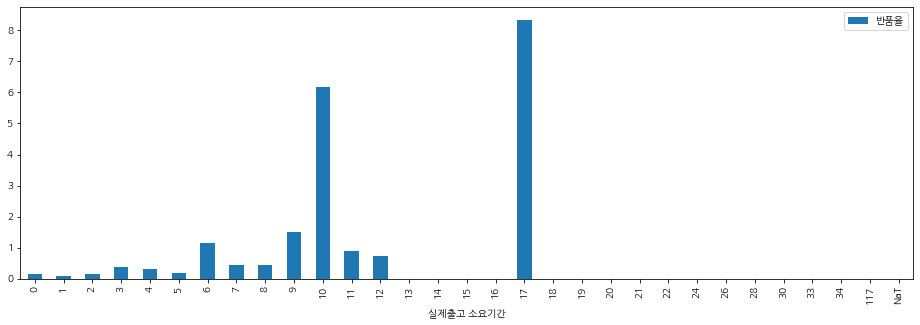

In [112]:
days_retrieve_df = pd.DataFrame({'실제출고 소요기간': days_retrieve, '반품율': days_retrieve_list})
days_retrieve_df.plot(kind = 'bar', x = '실제출고 소요기간', y = '반품율', figsize = (16, 5))

실제출고소요기간이 길어질수록 반품율이 점점 증가하는 경향을 보인다는 것을 알 수 있다.

주문취소와 반품율을 줄이기 위해서는, 예상출고소요기간과 실제출고소요기간을 줄이는 것이 유의미하다고 할 수 있다. 따라서 택배 배송사를 선정할 경우 가장 빠른 배송을 할 수 있는 곳으로 선정하는 마케팅 전략을 제시할 수 있다.

# <span style=" background-color:#F7DDBE;">**4. 마케팅 전략들 요약/정리**

#### 1. 거래처마다 포커싱하는 프로모션을 달리 하는 것
(1) 네이버 : 햇반 할인행사 / (2) 11번가 : 십일절
> 네이버
<br>햇반 할인행사 : 네이버의 주고객층인 젊은 소비층이 햇반 소비를 많이 하기 때문에 햇반 프로모션은 그들의 잠재 수요를 자극할 수 있다. (네이버 > 상온 > 햇반)
- 네이버 햇반 할인행사 : 작은 할인 행사 (10일에 한 번) - 20,000원대 & 큰 할인 행사 (30일에 한번) - 18000원대
- 할인금액 근거 : 주문일별 햇반 평균 가격 그래프 --> 햇반 평균 가격 그래프를 살펴보면 가격이 18000원대 초반까지 내려갔을 때 매우 유의미한 매출액 증대 효과를 갖기 때문에 소비자들이 할인에 큰 영향을 받는 상품이라는 분석을 할 수가 있다.
- 할인 행사 날짜 간격 근거 : 주문일별 햇반 매출액 그래프 --> 5월 18일과 6월 10일에만 햇반에 관한 매출액이 대폭 증가했기 때문에 이 날들의 간격인 23일 간격으로 할인을 진행하는 것이 가장 효과적이라는 분석을 할 수가 있다.

햇반 가격 그래프를 살펴보면 할인행사가 4~7일 간격으로 진행됐음을 알 수 있다. 그렇다면 5/17, 5/18, 6/10 를 제외한 다른 할인 날짜에도 매출이 급증했을까? 결론은 ‘그렇지 않다’ 이다. 눈에 띄는 매출 증대를 보여줬지만, 위의 3일에 비하면 현저히 저조하다고 할 수 있다. 차이는 가격이다. 위 3일은 18000원대의 가격으로 판매되었지만, 나머지 할인 day에는 20000원대에 가까운 가격임을 볼 수 있다. 따라서 한 달에 한 번, 큰 할인율을 내건 행사를 진행한다면 수요량이 폭증할 것이다.

> 11번가
<br>십일절 할인행사 : 11번가에서는 매월 11일마다 행사를 진행하기 때문에 해당 날들에는 11번가에 소비자들이 몰려있을 것이다. 그렇기 때문에 상품들의 프로모션을 통해서 그들의 관심을 끌어야한다.
- 십일절 할인행사 : 상품들의 할인 행사를 진행 --> 이윤 수치가 없기 때문에 정확한 수치는 구현해내기가 어렵다
- 할인 행사 근거 : 11번가 주문일별 매출액 그래프 --> 4월 11일과 5월 11일에 11번가 상품들의 매출액이 대폭 증하갰기 때문에 이 날에 수요가 엄청나다는 것을 분석을 할 수가 있다.

정확한 할인액은 구현하기가 어렵다. 할인율에 따라서 얼만큼의 이윤이 생겼는지에 대한 정보가 없기 때문이다. 할인을 진행시켜도 너무 큰 수치의 할인율을 진행시키게 된다면 기업 입장에서는 오히려 손해를 보기 때문이다.

#### 2. 상품들의 세분화된 그룹 (브랜드)에 따라서 묶음 판매를 달리하는 것
(1) 비비고

- 비비고 만두 : 묶음 수량 1, 2개
- 비비고 국 : 묶음 수량 1, 2, 18개
- 비비고 반찬 : 단일 상품
- 비비고 밥 : 묶음 수량 1, 2, 3, 4개

> 비비고의 경우 1개로 단일 판매하는 것이 대부분의 소비자들이 원하는 것이기 때문에 단일 상품으로 판매하지만 수요가 매우 높은 주문일인 11번가의 십일절 날에 묶음 판매를 진행시키면 묶음 수량에 관한 수요도 늘 것이 예상되기에 이것을 마케팅 전략으로 진행시켜도 된다.

(2) 백설
- 백설 기름 : 묶음 수량 1, 2, 3개
- 백설 조미료 : 단일 상품
- 백설 가루 : 묶음 수량 1, 2, 3, 4, 5, 6, 7, 8개, 즉 묶음 수량에 따른 효과가 크지 못함
- 백설 면 : 묶음 수량 1, 2, 3개, 즉 묶음 수량에 따른 효과가 크지 못함
- 백설 반찬 : 묶음수량 1, 2개

> 백설의 경우 가루와 면에는 묶음 판매가 큰 효과를 가져오지 못하기 때문에 해당 상품들에는 묶음 판매를 진행시키면 안된다.
<br> 조미료의 경우에는 단일 상품만이 매출액에 가장 큰 효과를 부르기 때문에 조미료에도 묶음 판매를 진행시키면 안된다.
<br> 하지만 가루와 반찬의 경우 묶음 판매를 진행시키는 것이 효과적이기 때문에 비비고와 같이 11번가의 십일절 날에 묶음 판매를 진행시키는 마케팅 전략을 진행시켜도 된다.

(3) 햇반
- 햇반 조리된 밥 : 단일 상품
- 햇반 밥 : 묶음 수량 1, 24개

> 햇반의 경우 1번 마케팅 전략과 연관 지어서 네이버에서 24개 묶음 판매를 해당 날짜들에 할인과 함께 진행하는 것으로 전략을 진행시키면 된다.

#### 3. 사은품 여부의 분석에 따른 사은품 포함 시키는 전략
(1) 비비고 / (2) 시럽

(1) 비비고
>비비고의 경우 사은품을 포함시킨 것과 안 시킨 것으로 세분화시켜놓은 P값이 0.02로 매우 낮기 때문에 사은품을 포함 시키는 것보다는 포함을 안 시키는 것이 매출액에 더욱 더 긍정적인 효과를 불러일으킨다. 그렇기 때문에 사은품 전략을 고려할 시에 비비고 제품들은 고려를 안하는 것이 맞다.

(2) 시럽
>시럽의 경우 사은품을 포함시킨 것과 안 시킨 것으로 세분화시켜놓은 P값이 0.97으로 매우 높기 때문에 사은품을 포함 시키던 안 시키던 효과는 미미하다는 결론을 지을 수가 있다. 대부분의 상품들은 포함 시키는 것이 덜 효과적이라서 P값이 낮게 나오지만 시럽의 경우에는 0.97으로 큰 효과를 불러일으키지는 않기 때문에 포함을 시켜도 안 시킨 것과는 비슷한 효과이다. 그렇기 때문에 전략으로는 수요가 적은 상품들을 시럽 상품들의 사은품으로 포함시켜 놓아서 마케팅 전략으로 진행하면 매출액에 긍정적인 효과를 불러일으킬 것이다.

#### 4. 동시 구매를 통해서 복합상품 마케팅 전략
>동시에 구매를 진행한 상품들 중에서 'CJ비비고왕교자455G*2EA/냉동'의 수치가 가장 높았기 때문에 이 상품이 어떤 상품들과 가장 많이 구매했는지에 대한 분석 결과 'CJ비비고왕교자1.05KG/냉동' 과 가장 많이 구매를 했다는 결과가 나왔다.

>소비자들은 구매를 할 때 해당 상품들을 동시에 구매를 하는 패턴을 보이고 있기 때문에 소비자들의 성격이 파악이 가능하다. 그렇기 때문에 두 상품들을 동시에 구매하는 것을 만족시키는 마케팅 전략인 'CJ비비고왕교자455G*2EA/냉동'과 'CJ비비고왕교자1.05KG/냉동'를 복합상품으로 판매하는 것이다.


# <span style=" background-color:#F7DDBE;">**5. 제언**

#### 1.)
> 기업은 이윤을 추구하는 영리성을 가진다. 따라서, 매출 증가보다 순이익을 증가시키는 것이 더욱 중요하다고 생각한다. 아래는 순이익을 계산하는 식이다.
<br>순이익 = (매출액-매출원가-판매관리비) + (금융수익-금융비용) + (영업외수익-영업외비용) - (법인세비용)
>>현재 주어진 데이터로는 순이익을 증가시킬 방법을 완벽히 분석하기 어렵지만, CJ제일제당 기업에서는 매출원가, 판매관리비, 법인세비용 등 모든 데이터를 갖추고 있을 것이다. 따라서 그동안 해온 분석방법과 추가적인 데이터를 결합하여 각각의 제품이 판매되었을 때의 순이익을 계산하여 이를 증가시키는 방향으로 분석을 다시 진행하면 좋은 방향이 될 것이다.
<br>
#### 2.)
> 모델링을 통해 더 정확한 인사이트를 도출할 수 있을 것이다. 
>>다만 이는 Track 2의 내용이기 때문에, 제언으로 다루기로 결정하였다. 회귀분석 등의 방식을 통해 다수의 인자들이 매출 혹은 순이익에 각각 어느정도의 가중치를 가지고 영향을 미치는지 더욱 정밀한 분석이 가능할 것이다.
<br>
#### 3.)
> 매출액을 분석할 때 11번가, 네이버의 메인 상단에 노출하는 광고는 강한 영향을 미칠 것으로 판단된다. 
>>따라서 과거의 홈페이지 노출 광고에 대한 데이터가 주어진다면 이를 활용해 요일이라는 특성과, 거래처별 사용자 특성 등 여러 요인과 결합치어 추가적인 인사이트를 얻을 수 있을 것으로 기대된다.
#### 4.)
> 범주형 컬럼들의 범주형 자료 분석 방법
>>사은품 여부의 경우나 마감구분과 같이 범주형 자료들은 위의 그래프와 같이 바 그래프로 표현할 것이 아니라 Logictic 회귀를 통해서 사은품을 포함했을 경우 매출액의 증가로 일으킬지에 대한 확률을 계산할 수 있게끔 하는 것이 훨씬 더 세부적으로 효과적이라고 판단한다. 하지만 현재 레벨과 해당 컬럼들을 고려해보면 전체적으로는 큰 영향을 안 끼칠 것으로 판단하기에 배제하였다.